<a href="https://colab.research.google.com/github/flaviohds/MVP_Machine_Learning/blob/main/MVP_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tempo aproximado de execução do notebook: 7 minutos caso os modelos sejam importados; 7 horas caso os modelos sejam retreinados.

Vide célula abaixo ⇓

In [1]:
# CÉLULA PARA DECIDIR SE OS MODELOS SERÃO TREINADOS OU IMPORTADOS

##############################################################
# MUDE "TRAIN_MODEL" PARA 1 CASO DESEJE RETREINAR OS MODELOS

TRAIN_MODEL = 0

# TEMPO ESTIMADO PARA RETREINAR OS MODELOS 7 HORAS
##############################################################

---
---
---

MVP feito para a *sprint* de **Machine Learning & Analytics** do MBA em **Ciencia de Dados e Analytics** pela PUC-rio
*   Autor: **Flávio Horsth De Seta**.
*   Projeto disponível em https://github.com/flaviohds/MVP_Machine_Learning .

Este MVP contém dois projetos indiretamente relacionados.

O primeiro projeto é um problema de previsão de série temporal e será resolvido com modelos clássicos de machine learning. O segundo problema é de processamento de linguagem natural e será resolvido com um modelo de deep learning.

Links para os notebooks individuais:

- [Parte 1](https://colab.research.google.com/drive/1bV7mV7KT1JuwP1OWms616Vu6A8XAAVDz?usp=sharing)
- [Parte 2](https://colab.research.google.com/drive/1SdTx1LPOtyvbheZABfX1Slof6XiT4h7V?usp=sharing)

#Preparação do ambiente

In [2]:
# Instalando dependências
! pip install transformers[torch] -q
! pip install datasets -q
! pip install evaluate -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 1.9 MB/s eta 0:00:00


In [3]:
# BIBLIOTECAS                                         # FOI UTILIZADO PARA
# bibliotecas comuns:
import pandas as pd                                   # manipular dataframes
import matplotlib.pyplot as plt                       # confecção de gráficos
import seaborn as sns                                 # confecção de gráficos
import numpy as np                                    # acessar constantes matemáticas
import time                                           # tempo de processamento
import datetime                                       # manipular datas
import joblib                                         # salvar e importar modelos

# bibliotecas da parte 1:
from urllib.request import urlopen                    # salvar e importar modelos
from statsmodels.graphics.tsaplots import plot_acf    # plotar correlação com lag
from sklearn.model_selection import train_test_split  # particionar dados
from sklearn.preprocessing import MinMaxScaler        # normalizar dados
from sklearn.preprocessing import StandardScaler      # padronizar dados
from sklearn.model_selection import KFold             # validação cruzada
from sklearn.model_selection import GridSearchCV      # busca de hiperparâmetros
from sklearn.pipeline import Pipeline                 # automatização de treinamento
from sklearn.metrics import mean_squared_error        # métrica de avaliação MSE
from sklearn.metrics import mean_absolute_error       # métrica de avaliação MAE
from sklearn.linear_model import LinearRegression     # algoritmo Regressão Linear
from sklearn.linear_model import Ridge                # algoritmo Ridge
from sklearn.linear_model import ElasticNet           # algoritmo Ridge+Lasso
from sklearn.neighbors import KNeighborsRegressor     # algoritmo KNN
from sklearn.tree import DecisionTreeRegressor        # algoritmo Árvore de Decisão
from sklearn.svm import SVR                           # algoritmo SVM
from sklearn.ensemble import RandomForestRegressor    # conselho de Árvores de Decisão
from sklearn.ensemble import VotingRegressor          # conselho personalizável
from prophet import Prophet                           # modelo para previsão de série temporal

# bibliotecas da parte 2:
import gdown                                          # baixar arquivos do google drive
import os                                             # manipular o diretório do ambiente
import zipfile                                        # manipular arquivos compactados
import evaluate                                       # acessar métria de acurácia
from sklearn.metrics import confusion_matrix          # gerar matriz de confusão
from sklearn.metrics import classification_report     # gerar métricas de classificação
from collections import Counter                       # contar valores numa lista
from datasets import load_dataset, Dataset            # classe de dataset do HuggingFace
from transformers import AutoModelForSequenceClassification, AutoTokenizer # modelo e tokenizador do HuggingFace
from transformers import Trainer, TrainingArguments   # treinador e argumentos do HuggingFace

In [4]:
# Comandos para personalização do notebook
seed = 33                                             # reprodutibilidade do notebook
np.random.seed(seed)                                  # reprodutibilidade do notebook
sns.set_theme()                                       # estilizar os gráficos
pd.set_option('display.precision', 3)                 # facilidade de leitura do dataframe

---
# <center> Parte 1: Previsão de série temporal com machine learning clássico
---

Nos dias atuais, muitas empresas têm interesse em estimar vendas diárias ou mensais, a fim de balancear gastos, lucros e metas. Este projeto tem como objetivo escolher um modelo clássico de machine learning que estime o valor das vendas diárias de uma empresa dos Estados Unidos em até 7 dias no futuro. Será verificado o erro para diferentes tipos de modelos, seleção de diferentes conjuntos de atributos, e o efeito da normalização para os modelos relevantes.

O dataset utilizado consiste nos valores diários de compras em um site que vende eletrônicos, mobília e material de escritório, focando em materiais para empresas ou para trabalho à distância. Cada linha representa o valor total das vendas naquele dia. Mais informações sobre o perfil das vendas podem ser obtidas no [trabalho anterior](https://github.com/flaviohds/MVP_Vendas_Analise), onde foi feito o tratamento dos dados e análise exploratória dos dados originários (obtidos em https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting , acesso em 04/2023).

Descrição dos atributos:

* day_of_week_sin/day_of_week_cos - dia da semana codificado¹ (numérico, contínuo)
* Is Holiday - se o dia é feriado ou não (booleano)
* soma das vendas - valor diário das vendas (numérico, contínuo)
* Month - mês (numérico, inteiro)
* Year - ano (numérico, inteiro)
* Day - dia (numérico, inteiro)
* vendas_t-x - colunas de *lag*² das vendas diárias deslocadas de x linhas (numérico, contínuo)

¹ *Foi utilizado um encoding trigonométrico para representar os dias da semana de forma numérica. Mais informações [aqui](https://colab.research.google.com/drive/18IbiSGZq93gUoOOAWgPGpZfT-E8HHNPz#scrollTo=4_2_Dia_da_semana).*

² *As colunas de lag consistem no atributo de 'soma das vendas' deslocada no tempo. Mais informações [aqui](https://colab.research.google.com/drive/18IbiSGZq93gUoOOAWgPGpZfT-E8HHNPz#scrollTo=4_4_Colunas_de_lag).*

O trabalho anterior já mostrou que **os dados em questão aparentam ser insuficientes e ruidosos**. Foi levantada a suspeita de que a loja não possui um volume de vendas necessário para que tenhamos uma tendência não-aleatória para cada dia, visto que existem dias com diversas vendas seguido de dias com nenhum produto vendido. Caso a loja tivesse uma abrangência maior, a variação de dia a dia tenderia a diminuir. **Mesmo assim, estes dados foram escolhidos para verificar se modelos de machine learning clássico são capazes de trabalhar com esse tipo de problema**.


---

## 1.1 Carregando o dataset e obtendo algumas informações sobre os dados

Primeiro se carrega os dados disponíveis no github do projeto.

In [5]:
url = 'https://raw.githubusercontent.com/flaviohds/MVP_Machine_Learning/main/daily_sales.csv'
df_raw = pd.read_csv(url)
df_raw

,Is Holiday,soma das vendas,Month,Year,Day,day_of_week_sin,day_of_week_cos,vendas_t-1,vendas_t-2,vendas_t-3,vendas_t-4,vendas_t-5,vendas_t-6,vendas_t-7
0,False,54.830,1,2015,10,-0.975,-0.223,40.544,0.000,87.158,4407.100,19.536,288.060,16.448
1,False,9.940,1,2015,11,-0.782,0.623,54.830,40.544,0.000,87.158,4407.100,19.536,288.060
2,False,0.000,1,2015,12,0.000,1.000,9.940,54.830,40.544,0.000,87.158,4407.100,19.536
3,False,3553.795,1,2015,13,0.782,0.623,0.000,9.940,54.830,40.544,0.000,87.158,4407.100
4,False,61.960,1,2015,14,0.975,-0.223,3553.795,0.000,9.940,54.830,40.544,0.000,87.158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,False,814.594,12,2018,26,0.975,-0.223,2698.927,6233.054,1926.776,7442.021,2140.940,377.736,1895.926
1447,False,177.636,12,2018,27,0.434,-0.901,814.594,2698.927,6233.054,1926.776,7442.021,2140.940,377.736
1448,False,1657.351,12,2018,28,-0.434,-0.901,177.636,814.594,2698.927,6233.054,1926.776,7442.021,2140.940
1449,False,2915.534,12,2018,29,-0.975,-0.223,1657.351,177.636,814.594,2698.927,6233.054,1926.776,7442.021


In [6]:
df_raw.describe()

,soma das vendas,Month,Year,Day,day_of_week_sin,day_of_week_cos,vendas_t-1,vendas_t-2,vendas_t-3,vendas_t-4,vendas_t-5,vendas_t-6,vendas_t-7
count,1451.000,1451.000,1451.000,1451.000,1451.000,1.451e+03,1451.000,1451.000,1451.000,1451.000,1451.000,1451.000,1451.000
mean,1487.991,6.553,2016.508,15.786,-0.001,2.763e-04,1487.527,1485.517,1484.435,1487.350,1486.802,1485.141,1480.856
std,1868.460,3.431,1.115,8.781,0.708,7.071e-01,1868.736,1868.767,1869.122,1870.380,1870.694,1870.687,1866.921
min,0.000,1.000,2015.000,1.000,-0.975,-9.010e-01,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,121.738,4.000,2016.000,8.000,-0.782,-9.010e-01,121.443,120.564,119.714,119.714,118.670,118.670,117.040
50%,807.540,7.000,2017.000,16.000,0.000,-2.225e-01,807.540,798.968,798.742,798.968,798.742,797.116,795.296
75%,2043.596,10.000,2018.000,23.000,0.782,6.235e-01,2043.596,2043.263,2043.263,2043.596,2043.596,2043.263,2042.270
max,7814.445,12.000,2018.000,31.000,0.975,1.000e+00,7814.445,7814.445,7814.445,7814.445,7814.445,7814.445,7814.445


Dataset carregado com sucesso. Dimensões e valores parecem estar de acordo com a [fonte](https://github.com/flaviohds/MVP_Vendas_Analise/blob/main/analise_vendas.ipynb). Nenhum valor nulo ou fora do intervalo esperado. Todos os valores são numéricos, com exceção do booleano 'Is Holiday'.

Os dados começam em 10/1/2015 e terminam em 30/12/2018. Venda máxima de 7814,445 e mínima de 0, com uma média de 1488 e desvio padrão de 1868. Essas medidas indicam grande variância dos valores de vendas.

Plota-se o gráfico para observar o comportamento temporal.

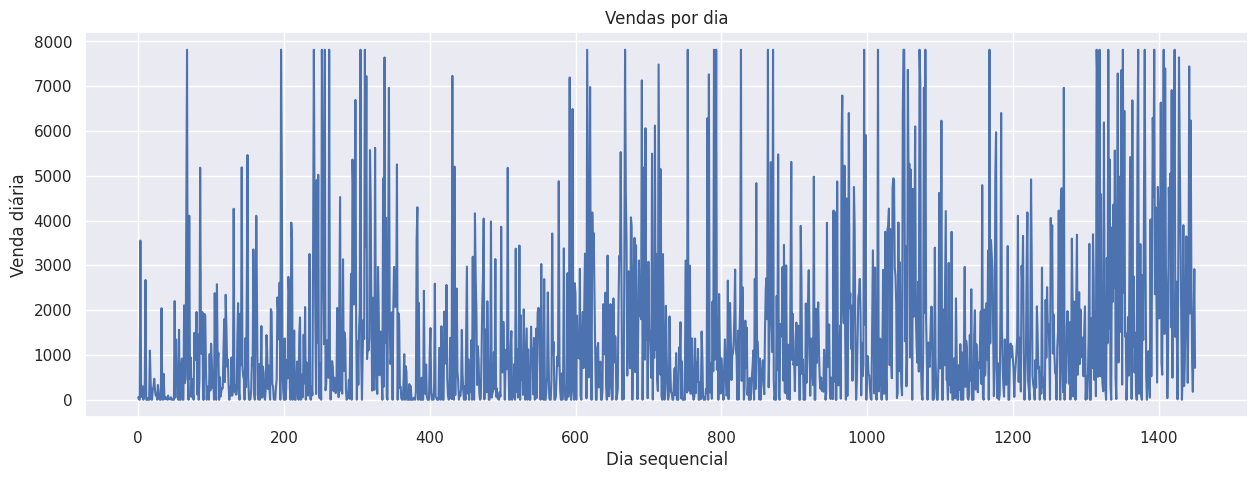

In [7]:
plt.figure(figsize=[15,5])

plt.plot(df_raw['soma das vendas'])

plt.title('Vendas por dia')
plt.xlabel('Dia sequencial')
plt.ylabel('Venda diária')

plt.show()

Nota-se uma alta variação de dia a dia. Aumentando o gráfico nos últimos 50 pontos:

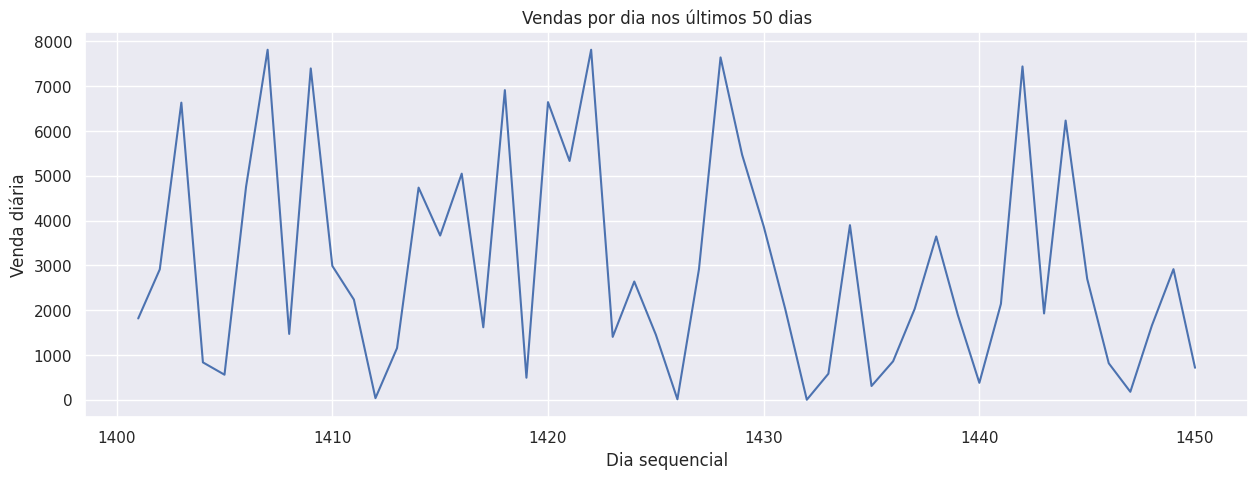

In [8]:
plt.figure(figsize=[15,5])

plt.plot(df_raw['soma das vendas'][-50:])

plt.title('Vendas por dia nos últimos 50 dias')
plt.xlabel('Dia sequencial')
plt.ylabel('Venda diária')

plt.show()

A grande variação entre dias fica ainda mais evidente.

Agora que temos uma ideia da nossa variável alvo, podemos começar a tomar decisões.



---

## 1.2 Feature selection

Como a maior parte do pre-processamento dos dados já foi feita, é hora de estudar a importância dos atributos para a previsão da venda diária. Podemos separar as colunas do dataset em dois tipos: atributos referentes a data e atributos de *lag*. Considerando que não temos um número de atributos máximo em mente, utilizaremos o método de feature selection por importância dos atributos.

Como existe um método mais robusto para verificar a relevância das colunas de *lag* (autocorrelação), primeiramente analizaremos elas separadamente.

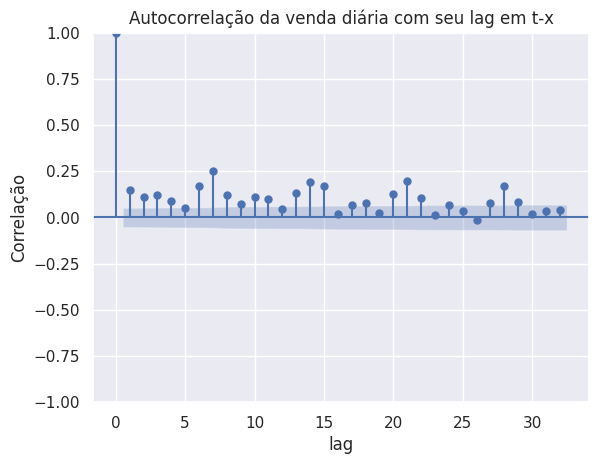

In [9]:
# Plota a função de autocorrelação
plot_acf(df_raw['soma das vendas'], lags=32,
         title='Autocorrelação da venda diária com seu lag em t-x')

plt.ylabel('Correlação')
plt.xlabel('lag')
plt.show()

O gráfico acima mostra a correlação da soma das vendas com a própria venda deslocada no tempo. Nota-se que a correlação diminui a medida que nos distanciamos do tempo atual. Ao mesmo tempo, existem picos em e ao redor dos pontos x=7,14,21,28, indicando que existe uma alta relação do valor da venda com seu valor nos mesmos dias de semanas passadas. Provavelmente essa relação pode ser capturada apenas utilizando uma semana mais um dia (lag=7), o que significa que utilizar lags maiores que esse apenas adicionariam atributos linearmente dependentes dos já existentes. A princípio, serão utilizados todos os lags até 7, mas é interessante ressaltar que existem valores entre t=0 e t=5 que apresentaram correlação consideravelmente menor do que os valores em t=6 e t=7.

Passando agora para os demais atributos, utilizaremos o algoritmo de random forest para descobrir a importância de cada atributo. Foi escolhido o algoritmo de random forest por ser um dos mais robustos e insensível à falta de normalização ou padronização na qual os nossos dados se encontram nesta etapa.

In [10]:
np.random.seed(seed)      # definição da semente para reprodutibilidade da célula

# Separação da variável alvo
y = df_raw['soma das vendas']
y = y.values
x = df_raw.drop('soma das vendas', axis=1)
x = x.values

# Instanciando e treinando o modelo
FS_model = RandomForestRegressor(n_estimators=20, random_state=seed)
FS_model.fit(x, y)

# Imprimindo o vetor com a importância de cada atributo
atribute_importance = pd.Series(list(FS_model.feature_importances_))
atribute_importance.index = df_raw.drop('soma das vendas', axis=1).columns
atribute_importance

Is Holiday         0.002
Month              0.137
Year               0.032
Day                0.088
day_of_week_sin    0.035
day_of_week_cos    0.036
vendas_t-1         0.076
vendas_t-2         0.103
vendas_t-3         0.093
vendas_t-4         0.077
vendas_t-5         0.089
vendas_t-6         0.093
vendas_t-7         0.140
dtype: float64

Utilizando os atributos de *lag* como referência, é fácil concluir que os atributos de dia da semana, ano e principalmente o de feriado tem uma importância consideravelmente menor que os outros. Logo, estes atributos serão descartados.

In [11]:
df = df_raw.copy()
df.drop(['Is Holiday', 'Year', 'day_of_week_sin', 'day_of_week_cos'], axis=1, inplace=True)
df.head()

,soma das vendas,Month,Day,vendas_t-1,vendas_t-2,vendas_t-3,vendas_t-4,vendas_t-5,vendas_t-6,vendas_t-7
0,54.830,1,10,40.544,0.000,87.158,4407.100,19.536,288.060,16.448
1,9.940,1,11,54.830,40.544,0.000,87.158,4407.100,19.536,288.060
2,0.000,1,12,9.940,54.830,40.544,0.000,87.158,4407.100,19.536
3,3553.795,1,13,0.000,9.940,54.830,40.544,0.000,87.158,4407.100
4,61.960,1,14,3553.795,0.000,9.940,54.830,40.544,0.000,87.158


---

## 1.3 Construção e aprimoramento do modelo de Machine Learning clássico

Agora que temos uma ideia do comportamento dos dados e escolhemos os atributos, podemos começar a escolher quais modelos serão testados e que pré-processamento adicionaremos aos pipelines.

### Modelo de teste



Primeiramente será testado um modelo simples para se ter uma ideia da complexidade do problema. Este modelo de teste tem os seguintes parâmetros dos dados e modelo:

- Atributos: Mês, Dia, lag das vendas de 1 a 7 dias
- Separação em treino e teste: 80%, 20%
- Tipo do modelo: árvore de decisão
- Sem normalização ou padronização
- Métrica de avaliação: erro médio absoluto

Foi escolhida uma árvore de decisão simples com os parâmetros padrão apenas para ter uma ideia da complexidade do problema. Como este tipo de modelo não é sensível ao valor dos dados, não foi realizada normalização.

Foi escolhido o erro absoluto médio ao invés do quadrático porque é mais simples comparar este erro com os valores que temos, já que ambos terão a mesma unidade. Ao mesmo tempo, o erro relativo não pode ser utilizado já que temos valores 0 na nossa variável alvo.

In [12]:
np.random.seed(seed)

y = df['soma das vendas']
y = y.values
x = df.drop('soma das vendas', axis=1)
x = x.values

# Realizando o holdout dos dados
x_train, x_test, y_train, y_test = train_test_split(x, y,
    test_size=0.2, shuffle=True, random_state=seed)

modelo = DecisionTreeRegressor(random_state=seed)

modelo.fit(x_train, y_train)

# Realizando a previsão dos dados de teste
y_pred = modelo.predict(x_test)

# Calculando o erro médio em toda a partição de teste
mean_absolute_error(y_test, y_pred)

1436.675115120275

Nota-se que o erro médio é bem alto neste modelo. O erro de 1436 é quase igual à média das vendas diárias (≈1488) e é quase 20% do valor máximo (≈7814). Estes valores começam a levantar suspeitas de que o problema em questão não é simples.

### Busca inicial do modelo



Agora que temos uma ideia melhor da complexidade do problema começa-se a busca por um bom modelo. Para isso utilizaremos os seguintes dados e modelos:


- Atributos: Mês, Dia, *lag* das vendas de 1 a 7 dias
- Validação cruzada de 5 partições
- Tipos de modelos utilizados:
  - KNN
  - Random Forest
  - Regressão linear
  - ElasticNet
  - SVM

Todos os modelos terão versões testadas com os **dados brutos, normalizados e padronizados**, com excessão do RandomForest e regressão linear, que são indiferentes ao redimensionamento dos dados. Além disso, o SVM sem redimensionamento estava resultando em tempos de execução muito longos sem retorno nos resultados, então ele será testado apenas com padronização e normalização.

Será utilizada a validação cruzada afim de automatizar a procura de hiperparâmetros que tenham melhor capacidade de generalizar o aprendizado do treino.

Primeiro, instanciamos a validação cruzada, os modelos e os pipelines. No nome dos pipelines abaixo, '_n' significa que os dados serão normalizados, e '_s' significa que eles serão padronizados.

In [13]:
np.random.seed(seed)

# Instanciando a partição da validação cruzada
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

# Definindo os modelos base
knn = ('KNN', KNeighborsRegressor())
rf = ('RF', RandomForestRegressor(random_state=seed))
lr = ('LR', LinearRegression())
en = ('EN', ElasticNet(random_state=seed))
svm = ('SVM', SVR())

# Definindo os pré-processamentos de redimensionamento
min_max_scaler = ('MinMaxScaler', MinMaxScaler())
std_scaler = ('StandardScaler', StandardScaler())

# Criando os pipelines dos modelos
pipelines=[]
pipelines.append(('KNN', Pipeline([knn])))
pipelines.append(('RF', Pipeline([rf])))
pipelines.append(('LR', Pipeline([lr])))
pipelines.append(('EN', Pipeline([en])))

pipelines.append(('KNN_n', Pipeline([min_max_scaler, knn])))
pipelines.append(('EN_n', Pipeline([min_max_scaler, en])))
pipelines.append(('SVM_n', Pipeline([min_max_scaler, svm])))

pipelines.append(('KNN_s', Pipeline([std_scaler, knn])))
pipelines.append(('EN_s', Pipeline([std_scaler, en])))
pipelines.append(('SVM_s', Pipeline([std_scaler, svm])))


Afim de buscar os melhores resultados, será realizada uma **busca de hiperparâmetros** para os modelos. Logo, temos que definir o conjunto de parâmetros que queremos testar para cada tipo de modelo.

In [14]:
# É criado um nested dictionary para acesso rápido e automático dos parâmetros
param_grid_grid = {
    'KNN': {
        'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21,55,100],
        'KNN__metric': ["euclidean", "manhattan", "minkowski"],
        'KNN__weights': ['uniform', 'distance']
        },
    'RF': {
        'RF__max_depth': [10, 30, 100],
        'RF__max_features': [1.0, 'sqrt'],
        'RF__min_samples_leaf': [1, 2, 4],
        'RF__min_samples_split': [2, 5, 10],
        'RF__n_estimators': [20, 50, 100, 200, 400]
        },
    'LR': {

           },
    'EN': {
        'EN__alpha': [0.001, 0.01, 0.05, 0.1, 0.4, 0.6, 0.8, 1.0, 2.0,
                      3.0, 5.0, 7.0, 10.0, 20, 50, 100, 500, 1000],
        'EN__l1_ratio': [0, 0.2, 0.4, 0.5, 0.6, 0.8, 1]
            },
    'SVM': {
        'SVM__kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
        'SVM__C' : [1,5,7,10,20,50,100,200]
        }
    }

Finalmente, realizamos a busca de hiperparâmetros para cada pipeline criado. A célula abaixo também irá imprimir o score de cada um dos pipelines e os parâmetros que obtiveram esses resultados. Também serão armazenados os dados da busca. Será utilizado o **erro quadrático médio** afim de penalizar erros grosseiros pontuais.

Note que a célula abaixo apenas realizará a busca e treinamento se a variável 'TRAIN_MODEL' for igual a 1. Caso contrário, os modelos e dados serão importados. Caso deseje realizar o treinamento novamente, modifique a primeira célula do notebook.

In [15]:
np.random.seed(seed)

# Para cada pipeline será acessada a grade de parâmetros, realizado o
# treino com validação cruzada e armazenados os resultados.
grid_data={}
for name, model in pipelines:
  key = name.replace('_n', '')
  key = key.replace('_s', '')
  param_grid = param_grid_grid[key]
  grid_str = 'grid_'+name+'1.pkl'

# Se a variável TRAIN_MODEL (definida no início do notebook) for igual a 1, o
# modelo será treinado. Caso contrário, o modelo e seus dados serão importados
  if TRAIN_MODEL == 1:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error',
                        cv=kfold, return_train_score=True, n_jobs=-1)
    start_time = time.time()
    grid.fit(x_train, y_train)
    end_time = time.time()
    print(f'tempo de treinamento: {(end_time-start_time):.03f}s')
    joblib.dump(grid, grid_str)

  else:
    base_model_url = 'https://raw.githubusercontent.com/flaviohds/MVP_Machine_Learning/main/models_p1/'
    grid = joblib.load(urlopen(base_model_url+grid_str))

  print('melhor %s score: %.2f usando %s' % (name, grid.best_score_, grid.best_params_))
  print('')
  grid_data[name] = pd.DataFrame(grid.cv_results_)

melhor KNN score: -3332703.85 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 55, 'KNN__weights': 'uniform'}

melhor RF score: -3055008.33 usando {'RF__max_depth': 10, 'RF__max_features': 'sqrt', 'RF__min_samples_leaf': 4, 'RF__min_samples_split': 2, 'RF__n_estimators': 50}

melhor LR score: -3183990.17 usando {}

melhor EN score: -3183990.17 usando {'EN__alpha': 0.001, 'EN__l1_ratio': 0.8}

melhor KNN_n score: -3189092.04 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 55, 'KNN__weights': 'distance'}

melhor EN_n score: -3177873.64 usando {'EN__alpha': 0.05, 'EN__l1_ratio': 0.8}

melhor SVM_n score: -3593778.61 usando {'SVM__C': 200, 'SVM__kernel': 'linear'}

melhor KNN_s score: -3202857.43 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 55, 'KNN__weights': 'distance'}

melhor EN_s score: -3178993.85 usando {'EN__alpha': 20, 'EN__l1_ratio': 1}

melhor SVM_s score: -3563890.32 usando {'SVM__C': 200, 'SVM__kernel': 'linear'}



Nota-se que o erro quadrático médio (MSE) é da ordem de 3 milhões. Tirando a raiz quadrada para ter uma ideia do quanto estamos errando, este MSE é equivalente a aproximadamente um erro de 1700 doláres em cada dia. Frente ao valor dos dados que temos, este erro ainda é muito grande, indicando que existe **underfitting**. Apesar disso, nota-se que os 3 melhores modelos sem repetição de tipo são:
- RandomForest
- ElasticNet com normalização
- KNN com normalização

Para visualizar melhor o erro de cada modelo, plota-se os **boxplots** dos erros nas partições de treino e validação para cada tipo de modelo com seus melhores hiperparâmetros obtidos.

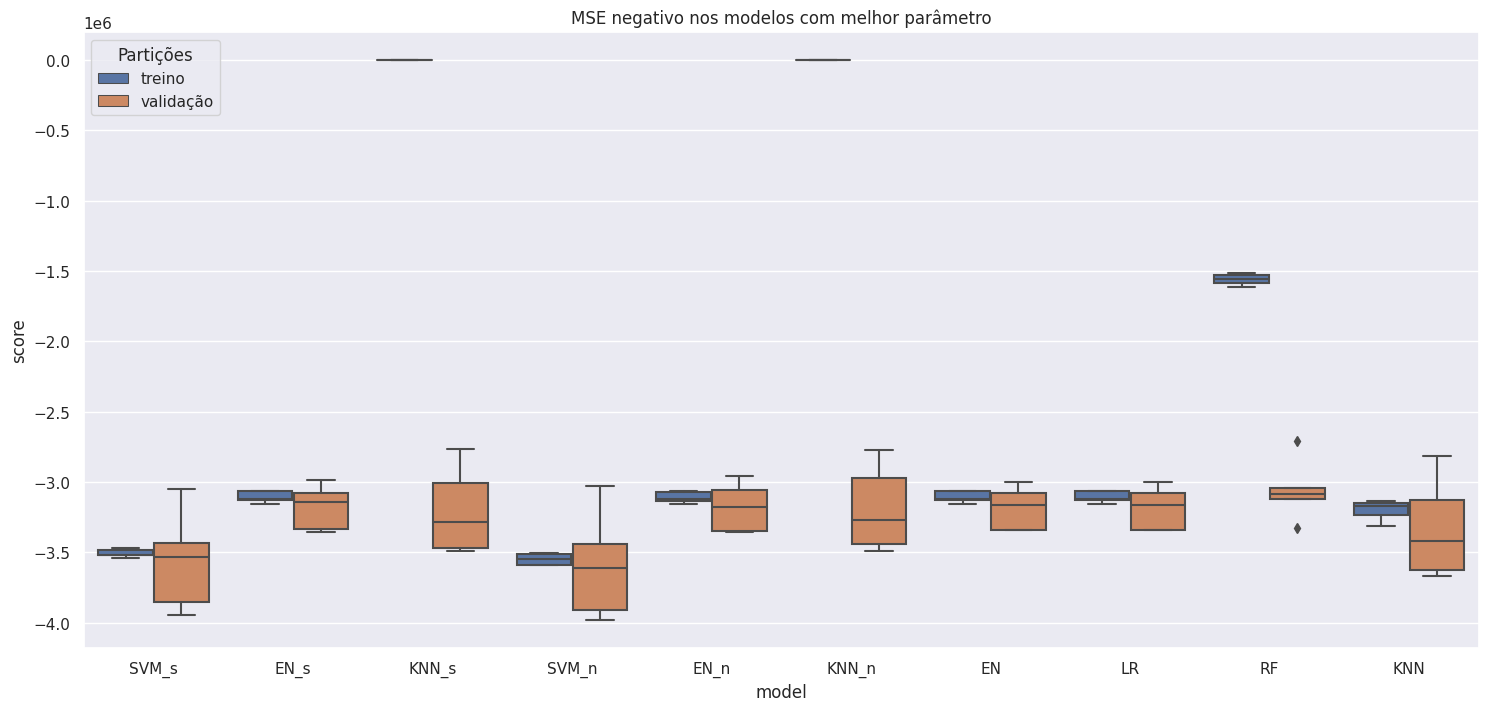

In [16]:
# Nomes das colunas de onde os dados de interesse serão retirados
test_columns=[]
train_columns=[]
for i in range(kfold.n_splits):
  test_column = 'split'+str(i)+'_test_score'
  test_columns.append(test_column)
  train_column = 'split'+str(i)+'_train_score'
  train_columns.append(train_column)

boxplot_df = pd.DataFrame(columns=['model', 'split', 'score'])

# Retira-se os dados do objeto criado pelo gridsearchcv para cada modelo
for key in grid_data.keys():
  model_df = grid_data[key]
  best_param_data = model_df[model_df['mean_test_score'] == model_df['mean_test_score'].max()]
  test_scores = best_param_data[test_columns].sample().values
  train_scores = best_param_data[train_columns].sample().values
  for test_score, train_score in zip(*test_scores, *train_scores):
    new_row = pd.DataFrame({'model': key, 'split': 'test', 'score': test_score}, index=[0])
    boxplot_df = pd.concat([new_row, boxplot_df], ignore_index=True)
    new_row = pd.DataFrame({'model': key, 'split': 'train', 'score': train_score}, index=[0])
    boxplot_df = pd.concat([new_row, boxplot_df], ignore_index=True)

# Renomeando as colunas para mais clareza no gráfico
boxplot_df.replace({'test': 'validação', 'train': 'treino'}, inplace=True)

plt.figure(figsize=[18,8])
sns.boxplot(boxplot_df, x='model', y='score', hue='split')
plt.legend(title='Partições', loc='upper left')
plt.title('MSE negativo nos modelos com melhor parâmetro')
plt.show()

Neste gráfico podemos perceber que, apesar de os modelos não terem conseguido erros satisfatórios, eles tenderam a erros da mesma ordem de grandeza. Este fato começa a levantar a **suspeita de que o problema está majoritariamente nos nossos dados**.

Além disso, apesar de apresentar ***underfitting*** aos dados de validação, a maioria dos modelos aparenta estar **livres de *overfitting*** aos dados de treino, já que ambos apresentam erros da mesma ordem de grandeza. **As exceções são os modelos de KNN normalizado e padronizado, e o modelo de RandomForest**. No KNN o erro igual a 0 se deve à particularidade do treino do algoritmo. No RandomForest, isso poderia significar que ocorreu *overfitting* do modelo em relação aos dados de treino, mas apesar indicar certo nível de *overfitting*, este modelo e parâmetros ainda foram melhores na validação do que todos os outros modelos.

Também podemos notar que o erro no treino não está tão distante do erro do teste. Por exemplo, se observarmos o gráfico abaixo do **RandomForest com o melhor score no treino**, podemos notar um nível de overfitting muito maior.

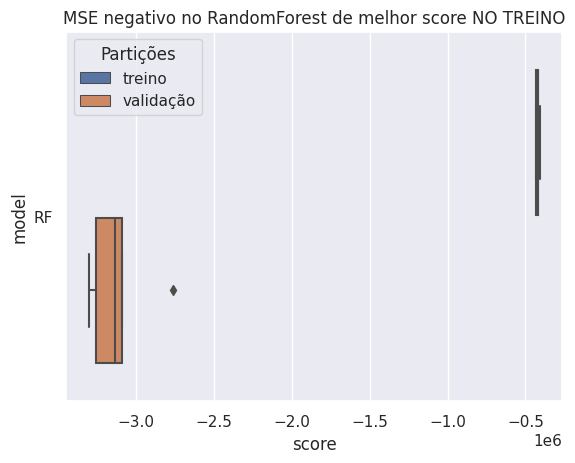

In [17]:
boxplot_df = pd.DataFrame(columns=['model', 'split', 'score'])

key = 'RF'
model_df = grid_data[key]
best_param_data = model_df[model_df['mean_train_score'] == model_df['mean_train_score'].max()]
test_scores = best_param_data[test_columns].sample().values
train_scores = best_param_data[train_columns].sample().values
for test_score, train_score in zip(*test_scores, *train_scores):
  new_row = pd.DataFrame({'model': key, 'split': 'test', 'score': test_score}, index=[0])
  boxplot_df = pd.concat([new_row, boxplot_df], ignore_index=True)
  new_row = pd.DataFrame({'model': key, 'split': 'train', 'score': train_score}, index=[0])
  boxplot_df = pd.concat([new_row, boxplot_df], ignore_index=True)

boxplot_df.replace({'test': 'validação', 'train': 'treino'}, inplace=True)

sns.boxplot(boxplot_df, x='score', y='model', hue='split')
plt.legend(title='Partições', loc='upper left')
plt.title('MSE negativo no RandomForest de melhor score NO TREINO')
plt.show()

Fica claro o overfitting nesta configuração, que não será utilizada porque teve um desempenho pior na validação.

In [18]:
# Seleciona apenas as colunas de parâmetros, score médio e rank na validação
RF_params = model_df[[col for col in model_df.columns if 'param_' in col
                      or col in ['mean_test_score', 'mean_train_score', 'rank_test_score']]]

# Seleciona a linha que tem o maior (menos negativo) erro no treino
RF_params[RF_params['mean_train_score'] == RF_params['mean_train_score'].max()]

,param_RF__max_depth,param_RF__max_features,param_RF__min_samples_leaf,param_RF__min_samples_split,param_RF__n_estimators,mean_test_score,rank_test_score,mean_train_score
139,30,sqrt,1,2,400,-3.111e+06,85,-421441.643


De fato, se observarmos os parâmetros utilizados no modelo do gráfico acima, o modelo contém alguns dos parâmetros mais especializados disponíveis no gridsearch, como número máximo de estimadores e número mínimo de observações por folha igual a 1. Isso fez com que o modelo aprendesse muito bem o treino. Como podemos observar, esse aprendizado não se traduziu para generalização no teste, já que esta combinação de parâmetros foi apenas a quadragésima quarta melhor configuração na validação.

Voltando agora para os resultados escolhidos pelo gridsearch, ficou claro que nossos resultados não foram satisfatórios.

### Testando outras configurações de atributo

Frente ao erro alto, tenta-se procurar diferentes configurações de atributos que resultem desempenho melhor. As configurações abaixo serão testadas com um gridsearch utilizando o pipeline de ElasticNet com normalização. Foi escolhido esse pipeline porque a ideia é fazer testes rápidos com várias configurações de atributos e parâmetros. Considerando que o RandomForest é bem mais devagar para treinar, foi escolhido o segundo melhor pipeline.

 Se o modelo obtiver um MSE consideravelmente menor do que o obtido com a configuração de atributos original (EN_n apresentou um MSE de -3177873.64), será considerado modificar os dados e realizar uma nova busca de modelos e hiperparâmetros.



Primeiramente, os atributos que foram descartados pelo feature selection serão reintroduzidos para os modelos, com excessão do atributo de feriado, que teve um valor de extremamente baixo no feature selection. Após os ajustes, ficamos com o dataframe abaixo.

In [19]:
df2 = df_raw.copy()
df2.drop(['Is Holiday'], axis=1, inplace=True)
df2.head()

,soma das vendas,Month,Year,Day,day_of_week_sin,day_of_week_cos,vendas_t-1,vendas_t-2,vendas_t-3,vendas_t-4,vendas_t-5,vendas_t-6,vendas_t-7
0,54.830,1,2015,10,-0.975,-0.223,40.544,0.000,87.158,4407.100,19.536,288.060,16.448
1,9.940,1,2015,11,-0.782,0.623,54.830,40.544,0.000,87.158,4407.100,19.536,288.060
2,0.000,1,2015,12,0.000,1.000,9.940,54.830,40.544,0.000,87.158,4407.100,19.536
3,3553.795,1,2015,13,0.782,0.623,0.000,9.940,54.830,40.544,0.000,87.158,4407.100
4,61.960,1,2015,14,0.975,-0.223,3553.795,0.000,9.940,54.830,40.544,0.000,87.158


In [20]:
np.random.seed(seed)

y2 = df2['soma das vendas']
y2 = y2.values
x2 = df2.drop('soma das vendas', axis=1)
x2 = x2.values

# Realiza o novo holdout, já que estamos trabalhando com um novo dataframe
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2,
                                test_size=0.2, shuffle=True, random_state=seed)

name, model = pipelines[5]        # Seleciona o pippeline de interesse
key = name.replace('_s', '')
key = key.replace('_n', '')
param_grid = param_grid_grid[key]

grid2 = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error',
                    cv=kfold, return_train_score=True, n_jobs=-1)
grid2.fit(x2_train, y2_train)
print("melhor %s score: %.2f usando %s" % (name, grid2.best_score_, grid2.best_params_))

melhor EN_n score: -3079337.62 usando {'EN__alpha': 0.05, 'EN__l1_ratio': 0.8}


Obtivemos um MSE menor. Parte desta melhora pode ser pelo Por causa do novo *holdout* realizado, mas como é uma melhora significativa, vale a pena testarmos. Ainda sim, continua-se a busca por uma configuração de atributos melhor. O erro de referência agora é: -3079337.62

Na próxima configuração utilizaremos os mesmos atributos que a configuração original, mas dobraremos o número de colunas de lag.

In [21]:
df3 = df.copy()
for i in range(7):      # Cria as novas colunas de lag
  df3['vendas_t-'+str(i+8)] = df3['vendas_t-7'].shift(i+1)
df3.dropna(axis=0, how='any', inplace=True)
df3.head()

,soma das vendas,Month,Day,vendas_t-1,vendas_t-2,vendas_t-3,vendas_t-4,vendas_t-5,vendas_t-6,vendas_t-7,vendas_t-8,vendas_t-9,vendas_t-10,vendas_t-11,vendas_t-12,vendas_t-13,vendas_t-14
7,0.000,1,17,299.964,149.950,61.960,3553.795,0.000,9.940,54.830,40.544,0.000,87.158,4407.100,19.536,288.060,16.448
8,64.864,1,18,0.000,299.964,149.950,61.960,3553.795,0.000,9.940,54.830,40.544,0.000,87.158,4407.100,19.536,288.060
9,378.594,1,19,64.864,0.000,299.964,149.950,61.960,3553.795,0.000,9.940,54.830,40.544,0.000,87.158,4407.100,19.536
10,2673.870,1,20,378.594,64.864,0.000,299.964,149.950,61.960,3553.795,0.000,9.940,54.830,40.544,0.000,87.158,4407.100
11,0.000,1,21,2673.870,378.594,64.864,0.000,299.964,149.950,61.960,3553.795,0.000,9.940,54.830,40.544,0.000,87.158


In [22]:
np.random.seed(seed)

y3 = df3['soma das vendas']
y3 = y3.values
x3 = df3.drop('soma das vendas', axis=1)
x3 = x3.values

x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3,
                                test_size=0.2, shuffle=True, random_state=seed)

grid3 = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error',
                    cv=kfold, return_train_score=True, n_jobs=-1)
grid3.fit(x3_train, y3_train)
print("melhor %s score: %.3f usando %s" % (name, grid3.best_score_, grid3.best_params_))

melhor EN_n score: -3087526.070 usando {'EN__alpha': 0.05, 'EN__l1_ratio': 0.6}


Score pior do que a configuração anterior. O warning de convergência acima indica que uma das combinações não convergiu e sugere a utilização do algoritmo Ridge nessa situação em que l1_ratio é 0. É interessante testar se obteremos um score melhor com o modelo Ridge.

In [23]:
np.random.seed(seed)

ridge = ('Ridge', Ridge(random_state=seed))
pipeline_ridge = Pipeline([min_max_scaler, ridge])

param_grid_ridge = {
        'Ridge__alpha': [0.001, 0.01, 0.05, 0.1, 0.4, 0.6, 0.8, 1.0, 2.0,
                         3.0, 5.0, 7.0, 10.0, 20, 50, 100, 500, 1000]
            }

grid_ridge = GridSearchCV(estimator=pipeline_ridge, param_grid=param_grid_ridge,
                     scoring='neg_mean_squared_error', cv=kfold,
                     return_train_score=True, n_jobs=-1)
grid_ridge.fit(x3_train, y3_train)
print("melhor %s score: %.3f usando %s" % ('Ridge_n', grid_ridge.best_score_,
                                           grid_ridge.best_params_))

melhor Ridge_n score: -3087409.161 usando {'Ridge__alpha': 20}


Mesmo convergindo, esta configuração não apresentou MSE melhor do que a primeira testada nessa seção.

Nesta próxima configuração testaremos a hipótese presente na literatura que diz que o modelo deve aprender a sazonalidade do problema apenas por meio de colunas de lag, sem acesso a mais nenhum atributo.

In [24]:
df4 = df3.copy()
df4 = df4.drop(['Month', 'Day'], axis=1)
df4.head()

,soma das vendas,vendas_t-1,vendas_t-2,vendas_t-3,vendas_t-4,vendas_t-5,vendas_t-6,vendas_t-7,vendas_t-8,vendas_t-9,vendas_t-10,vendas_t-11,vendas_t-12,vendas_t-13,vendas_t-14
7,0.000,299.964,149.950,61.960,3553.795,0.000,9.940,54.830,40.544,0.000,87.158,4407.100,19.536,288.060,16.448
8,64.864,0.000,299.964,149.950,61.960,3553.795,0.000,9.940,54.830,40.544,0.000,87.158,4407.100,19.536,288.060
9,378.594,64.864,0.000,299.964,149.950,61.960,3553.795,0.000,9.940,54.830,40.544,0.000,87.158,4407.100,19.536
10,2673.870,378.594,64.864,0.000,299.964,149.950,61.960,3553.795,0.000,9.940,54.830,40.544,0.000,87.158,4407.100
11,0.000,2673.870,378.594,64.864,0.000,299.964,149.950,61.960,3553.795,0.000,9.940,54.830,40.544,0.000,87.158


In [25]:
np.random.seed(seed)

y4 = df4['soma das vendas']
y4 = y4.values
x4 = df4.drop('soma das vendas', axis=1)
x4 = x4.values

x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4,
                                test_size=0.2, shuffle=True, random_state=seed)

grid4 = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error',
                    cv=kfold, return_train_score=True, n_jobs=-1)
grid4.fit(x4_train, y4_train)
print("melhor %s score: %.4f usando %s" % (name, grid4.best_score_, grid4.best_params_))

melhor EN_n score: -3154854.1849 usando {'EN__alpha': 0.05, 'EN__l1_ratio': 0.6}


Score consideravelmente pior.

Antes de passar para a próxima configuração, será interessante verificar se não estamos caindo em um "problema" comum na previsão de séries temporais, o RandomWalk.

### RandomWalk

Plota-se a previsão do modelo acima e os dados reais para comparação, ampliando um intervalo para melhor visualização.

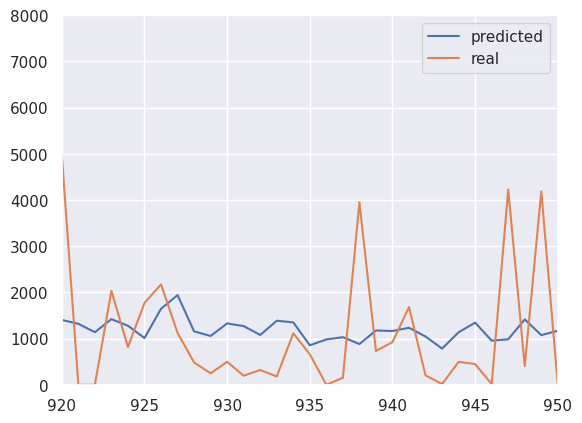

In [26]:
y4pred = grid4.predict(x4)
plt.plot(y4pred, label='predicted')
plt.plot(y4, label='real')

plt.axis([920, 950, 0, 8000])
plt.legend()
plt.show()

No gráfico acima é possível observar uma certa tendência com relação à previsão do modelo em um ponto $x$ e o ponto real em $x-1$. Por exemplo, nos pontos 925 a 928, fica claro que a previsão do modelo mimetizou o ponto anterior. É possível notar esse comportamento em outros pontos do gráfico, onde o modelo segue a tendência do valor real, mas deslocado de um ou dois dias, apesar de nem sempre conseguir acompanhar na amplitude. Isso acontece quando os dados apresentam um comportamento chamado de RandomWalk, onde o valor atual é um deslocamento aleatório (geralmente pequeno) do valor anterior, e que este deslocamento não pode ser efetivamente previsto. Isso faz com que a melhor previsão de um modelo seja o seu lag em $t-1$. De certa forma, isso configura um problema se acontecer com muito frequência já que, para dizer que as vendas diárias serão próximas as mesmas do dia anterior, não é necessário um modelo de *machine learning*.

Para verificar se nosso modelo está de fato tentando prever o comportamento de RandomWalk podemos calcular a correlação da previsão do modelo com seus lags em $t-1$ e $t-2$.

In [27]:
df_rw = df4[['vendas_t-1', 'vendas_t-2']].copy()
df_rw['previsto'] = y4pred
df_rw.corr()['previsto']

vendas_t-1    0.461
vendas_t-2    0.320
previsto      1.000
Name: previsto, dtype: float64

Nota-se que a correlação não é tão alta assim, o que significa que não estamos tão próximos do comportamento de RandomWalk. Mesmo assim, será interessante ver o que acontece com o erro quando removemos o *lag* do dia anterior e de dois dias antes. Logo, testaremos mais essa configuração.

In [28]:
df5 = df.copy()
df5 = df5.drop(['vendas_t-1', 'vendas_t-2'], axis=1)
df5.head()

,soma das vendas,Month,Day,vendas_t-3,vendas_t-4,vendas_t-5,vendas_t-6,vendas_t-7
0,54.830,1,10,87.158,4407.100,19.536,288.060,16.448
1,9.940,1,11,0.000,87.158,4407.100,19.536,288.060
2,0.000,1,12,40.544,0.000,87.158,4407.100,19.536
3,3553.795,1,13,54.830,40.544,0.000,87.158,4407.100
4,61.960,1,14,9.940,54.830,40.544,0.000,87.158


In [29]:
np.random.seed(seed)

y5 = df5['soma das vendas']
y5 = y5.values
x5 = df5.drop('soma das vendas', axis=1)
x5 = x5.values

x5_train, x5_test, y5_train, y5_test = train_test_split(x5, y5,
                                test_size=0.2, shuffle=True, random_state=seed)

grid5 = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error',
                    cv=kfold, return_train_score=True, n_jobs=-1)
grid5.fit(x5_train, y5_train)
print("melhor %s score: %.5f usando %s" % (name, grid5.best_score_, grid5.best_params_))

melhor EN_n score: -3182684.30104 usando {'EN__alpha': 0.01, 'EN__l1_ratio': 0.2}


A segunda configuração ainda é a melhor, com um score de -3079337.62 MSE.

Agora que fizemos uma busca inicial de hiperparâmetros e configuração de atributos, podemos começar a refinar nossa busca.

### Busca refinada

Até agora, os modelos com melhor desempenho foram:
- RandomForest usando {'RF__max_depth': 10, 'RF__max_features': 'sqrt', 'RF__min_samples_leaf': 4, 'RF__min_samples_split': 2, 'RF__n_estimators': 50}
- ElasticNet com normalização usando {'EN__alpha': 0.05, 'EN__l1_ratio': 0.8}
- KNN com normalização usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 55, 'KNN__weights': 'distance'}

E a configuração de atributos que parece ter o melhor desempenho é:
- Ano
- Mês
- Dia
- Duas colunas que indicam o dia da semana
- Lag de 1 a 7 dias

Com essas informações, será realizada uma nova busca de hiperparâmetros mais refinada, buscando em valores próximos aos parâmetros encontrados anteriormente.

O dataframe que será utilizado é o seguinte:

In [30]:
df2.head()

,soma das vendas,Month,Year,Day,day_of_week_sin,day_of_week_cos,vendas_t-1,vendas_t-2,vendas_t-3,vendas_t-4,vendas_t-5,vendas_t-6,vendas_t-7
0,54.830,1,2015,10,-0.975,-0.223,40.544,0.000,87.158,4407.100,19.536,288.060,16.448
1,9.940,1,2015,11,-0.782,0.623,54.830,40.544,0.000,87.158,4407.100,19.536,288.060
2,0.000,1,2015,12,0.000,1.000,9.940,54.830,40.544,0.000,87.158,4407.100,19.536
3,3553.795,1,2015,13,0.782,0.623,0.000,9.940,54.830,40.544,0.000,87.158,4407.100
4,61.960,1,2015,14,0.975,-0.223,3553.795,0.000,9.940,54.830,40.544,0.000,87.158


Agora definimos os novos hiperparâmetros que queremos testar.

In [31]:
param_grid_grid2 = {
    'KNN': {
        'KNN__n_neighbors': [1,10,18,20,22,23,25,28,30,35,40,45,50,52,54,55,
                             56,58,60,64,68,75,85,100],
        'KNN__metric': ['euclidean', 'manhattan', 'minkowski'],
        'KNN__weights': ['uniform', 'distance']
        },
    'RF': {
        'RF__max_depth': [5,10,15,20,30,40],
        'RF__max_features': ['sqrt'],
        'RF__min_samples_leaf': [2,3,4,5,6,8,10],
        'RF__min_samples_split': [2,3,4,5,10],
        'RF__n_estimators': [20,40,45,50,55,60,65,75,85,100]
        },
    'EN': {
        'EN__alpha': [0.001,0.01,0.03,0.04,0.05,0.06,0.07,0.08,0.1,0.2,0.6,
                      0.8,1,2,3,4,5,6,7,8,10,20,50,100,500],
        'EN__l1_ratio': [0,0.2,0.5,0.6,0.7,0.8,0.9,1]
            }
    }

Finalmente, definimos os pipelines e fazemos a nova busca.

Note que a célula abaixo apenas realizará a busca e treinamento se a variável 'TRAIN_MODEL' for igual a 1. Caso contrário, os modelos e dados serão importados. Caso deseje realizar o treinamento novamente, modifique a primeira célula do notebook.

In [32]:
np.random.seed(seed)

pipelines2 = []
pipelines2.append(('KNN_n', Pipeline([min_max_scaler, knn])))
pipelines2.append(('EN_n', Pipeline([min_max_scaler, en])))
pipelines2.append(('RF', Pipeline([rf])))

grid_data2 = {}

for name, model in pipelines2:
  key = name.replace('_n', '')
  key = key.replace('_s', '')
  param_grid = param_grid_grid2[key]
  grid_str = 'grid_'+name+'2.pkl'

  if TRAIN_MODEL == 1:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error',
                        cv=kfold, return_train_score=True, n_jobs=-1)
    start_time = time.time()
    grid.fit(x2_train, y2_train)
    end_time = time.time()
    print(f'tempo de treinamento: {(end_time-start_time):.03f}s')
    joblib.dump(grid, grid_str)

  else:
    base_model_url = 'https://raw.githubusercontent.com/flaviohds/MVP_Machine_Learning/main/models_p1/'
    grid = joblib.load(urlopen(base_model_url+grid_str))

  print('melhor %s score: %.2f usando %s' % (name, grid.best_score_, grid.best_params_))
  print('')
  grid_data2[name] = pd.DataFrame(grid.cv_results_)

melhor KNN_n score: -3002463.00 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 28, 'KNN__weights': 'distance'}

melhor EN_n score: -3079010.58 usando {'EN__alpha': 0.07, 'EN__l1_ratio': 0.8}

melhor RF score: -2935007.26 usando {'RF__max_depth': 10, 'RF__max_features': 'sqrt', 'RF__min_samples_leaf': 6, 'RF__min_samples_split': 2, 'RF__n_estimators': 55}



Por conveniência, repete-se os erros e parâmetros achados na busca anterior com configuração de atributos inicial:

melhor KNN_n score: -3189092.04 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 55, 'KNN__weights': 'distance'}

melhor EN_n score: -3177873.64 usando {'EN__alpha': 0.05, 'EN__l1_ratio': 0.8}

melhor RF score: -3055008.33 usando {'RF__max_depth': 10, 'RF__max_features': 'sqrt', 'RF__min_samples_leaf': 4, 'RF__min_samples_split': 2, 'RF__n_estimators': 50}

Nota-se que, com esta nova configuração de atributos e uma busca mais refinada, foi possível diminuir o erro de todos os modelos:

- KNN_n foi de -3183990.17 para -3002463.00
- EN_n foi de -3177873.64 para -3079010.58
- RF foi de -3055008.33 para -2935007.26

Mesma com essa diminuição, fica claro que os modelos ainda não conseguem fazer um bom trabalho, visto que os MSE ainda estão perto de 3 milhões.

Como última tentativa de melhorar o erro sem sair de modelos de machine learning clássico, podemos verificar se um conselho dos 3 melhores modelos conseguem obter um erro menor do que o RandomForest isoladamente.

Como o KNN e ElasticNet apresentaram melhoras com a normalização, e o RandomForest não é afetado por redimensionamento, será realizada a normalização neste modelo de conselho.

In [33]:
np.random.seed(seed)

# Define os modelos de base com os hiperparâmetros desejados
base_models = []
model1 = KNeighborsRegressor(metric='manhattan', n_neighbors=28,
                                    weights='distance')
model2 = ElasticNet(alpha=0.07, l1_ratio=0.8, random_state=seed)
model3 = RandomForestRegressor(max_depth=10, max_features='sqrt',
                                        min_samples_leaf=6, n_estimators=55,
                                        min_samples_split=2, random_state=seed)

base_models.append(('KNN', model1))
base_models.append(('EN', model2))
base_models.append(('RF', model3))

# Instanciando o conselho
voting = ('Voting', VotingRegressor(base_models))

ensemble = Pipeline([min_max_scaler, voting])

name = 'Voting_n'
param_grid = {'Voting__weights':  [None, [0.1, 0.1, 0.8], [0.2, 0.2, 0.6],
                                   [0.3, 0.3, 0.4], [0.4, 0.4, 0.2],
                                   [0.4, 0.3, 0.3], [0.3, 0.4, 0.3]]}

grid_str = 'grid_'+name+'2.pkl'

if TRAIN_MODEL == 1:
  grid = GridSearchCV(estimator=ensemble, param_grid=param_grid,
                      scoring='neg_mean_squared_error', cv=kfold,
                      return_train_score=True, n_jobs=-1, refit=True)

  start_time = time.time()
  grid.fit(x2_train, y2_train)
  end_time = time.time()
  print(f'tempo de treinamento: {(end_time-start_time):.03f}s')
  joblib.dump(grid, grid_str)

else:
  base_model_url = 'https://raw.githubusercontent.com/flaviohds/MVP_Machine_Learning/main/models_p1/'
  grid = joblib.load(urlopen(base_model_url+grid_str))

print('melhor %s score: %.2f usando %s' % (name, grid.best_score_, grid.best_params_))

melhor Voting_n score: -2923055.14 usando {'Voting__weights': [0.2, 0.2, 0.6]}


O conselho obteve um score um pouco melhor na validação do que o melhor modelo isoladamente. Também é interessante notar que a melhor configuração do conselho foi utilizando um peso maior para o RandomForest, que foi o melhor de seus 3 modelos. Isso significa que, apesar de os dois outros modelos serem piores que o RandomForest, a previsão do KNN e do ElasticNet ajudam a reduzir o erro total.

In [34]:
# Salva o melhor modelo em uma nova variável e em um arquivo pkl
if TRAIN_MODEL == 1:
  chosen_model = grid.best_estimator_
  joblib.dump(chosen_model, 'chosen_model.pkl')

else:
  base_model_url = 'https://raw.githubusercontent.com/flaviohds/MVP_Machine_Learning/main/models_p1/'
  chosen_model = joblib.load(urlopen(base_model_url+'chosen_model.pkl'))

chosen_model

Pipeline(steps=[('MinMaxScaler', MinMaxScaler()),
                ('Voting',
                 VotingRegressor(estimators=[('KNN',
                                              KNeighborsRegressor(metric='manhattan',
                                                                  n_neighbors=28,
                                                                  weights='distance')),
                                             ('EN',
                                              ElasticNet(alpha=0.07,
                                                         l1_ratio=0.8,
                                                         random_state=33)),
                                             ('RF',
                                              RandomForestRegressor(max_depth=10,
                                                                    max_features='sqrt',
                                                                    min_samples_leaf=6,
                                                                    n_estimators=55,
                                                                    random_state=33))],
                                 weights=[0.2, 0.2, 0.6]))])

### Testando o modelo final

Por fim, agora que acreditamos ter achado o melhor modelo, utilizaremos toda a base de treino para treinamento, afim de aumentar o tamanho de dados disponível para o nosso modelo. Também é preciso testar o modelo na partição de teste para verificar como ele se comporta frente à dados que não foram vistos durante o treinamento.

In [35]:
np.random.seed(seed)

chosen_model.fit(x2_train, y2_train)

y2_pred = chosen_model.predict(x2_train)

MAE_train = mean_absolute_error(y2_train, y2_pred)
MSE_train = mean_squared_error(y2_train, y2_pred)

print('dados do treino:')
print('erro médio absoluto: ', MAE_train)
print('erro médio quadrático: ', MSE_train)

y2_pred = chosen_model.predict(x2_test)

MAE_test = mean_absolute_error(y2_test, y2_pred)
MSE_test = mean_squared_error(y2_test, y2_pred)

print('')
print('dados do teste:')
print('erro médio absoluto: ', MAE_test)
print('erro médio quadrático: ', MSE_test)

dados do treino:
erro médio absoluto:  833.1319169755864
erro médio quadrático:  1345445.036595691

dados do teste:
erro médio absoluto:  1159.7597089423973
erro médio quadrático:  2513302.671383544


O modelo de conselho obteve um MSE da ordem de 2.5 milhões e um MAE de 1160 nos dados de teste. É interessante o fato de termos achado um MSE de teste menor do que o médio encontrado na validação cruzada. De qualquer forma nota-se que o MAE é consideravelmente melhor do que o erro de 1436 encontrado no nosso modelo de inicial. Mesmo com essa melhora, continuamos com um erro alto. Ao que tudo indica, este erro se deve à baixa qualidade dos dados.

Também nota-se que o erro médio absoluto não é muito menor no treino, o que significa que nosso modelo não apresenta overfitting.

Será interessante comparar a previsão do conselho com o valor observado em um trecho qualquer do dataset.

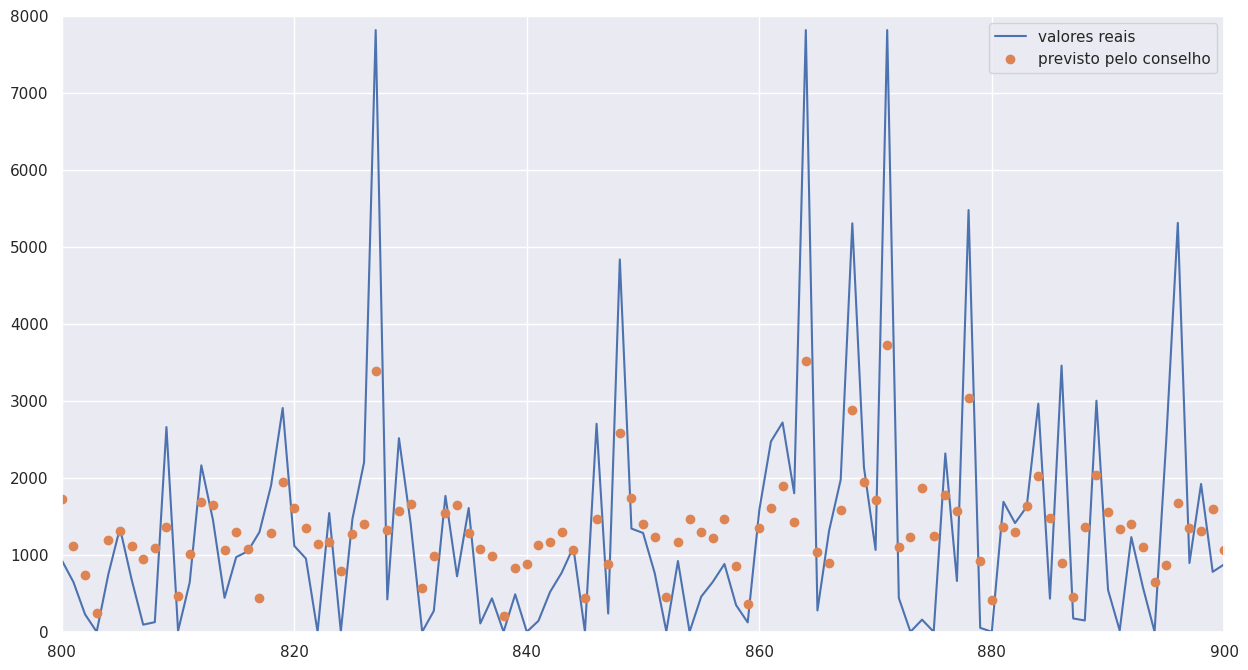

In [36]:
y2_pred = chosen_model.predict(x2)

plt.figure(figsize=[15,8])

plt.plot(y2, label='valores reais')
plt.plot(y2_pred, 'o', label='previsto pelo conselho')

plt.axis([800, 900, 0, 8000])
plt.legend()
plt.title('')
plt.show()

Apesar de o modelo ter problemas em prever os valores extremos, fica claro que ele consegue acompanhar, na maioria dos dias, a tendência dos dados observados. Por exemplo, observando os dados entre x=840..860, o modelo acerta quase todos os momentos de subida e de descida, apesar de não conseguir acompanhar a magnitude dos vales e picos de venda. Mesmo tendo um erro médio de cerca de 78% do valor médio diário, este modelo claramente pode ser utilizado para prever futuras tendências das vendas da loja.

Por fim, para poder descrever nosso modelo completamente, falta apenas explicitar os valores utilizados pelo normalizador.

In [37]:
print('dados utilizados para a normalização:')
print('valor mínimo por atributo:', chosen_model[0].data_min_)
print('valor máximo por atributo:', chosen_model[0].data_max_)

dados utilizados para a normalização:
valor mínimo por atributo: [ 1.00000000e+00  2.01500000e+03  1.00000000e+00 -9.74927912e-01
 -9.00968868e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
valor máximo por atributo: [1.20000000e+01 2.01800000e+03 3.10000000e+01 9.74927912e-01
 1.00000000e+00 7.81444500e+03 7.81444500e+03 7.81444500e+03
 7.81444500e+03 7.81444500e+03 7.81444500e+03 7.81444500e+03]


### Descrição do modelo final

O melhor modelo e atributos encontrado pode ser descrito por:

- Conselho utilizando os pesos de 0,2, 0,2 e 0,6 para seus 3 modelos, respectivamente:
  - KNN com: {metric='manhattan', n_neighbors=21, weights='distance'}
  - ElasticNet com: {alpha=0.05, l1_ratio=0.8}
  - RandomForest com: {max_depth=30, max_features='sqrt', min_samples_leaf=2, n_estimators=200, min_samples_split=10, random_state=33}
- Atributos de:
  - mês
  - ano
  - dia
  - seno do dia da semana
  - cosseno do dia da semana
  - venda do dia anterior
  - venda de 2 dias atrás
  - venda de 3 dias atrás
  - venda de 4 dias atrás
  - venda de 5 dias atrás
  - venda de 6 dias atrás
  - venda de 7 dias atrás
- Normalização com os seguintes valores mínimos e máximos para cada atributo:

Atributo  | Mínimo        | Máximo
---       | ---           | ---
mês       | 1             | 12
ano       | 2015          | 2018
dia       | 1             | 31
sen       | -0.974927912  | 0.974927912
cos       | -0.900968868  | 1
lag 1     | 0             | 7814.44500
lag 2     | 0             | 7814.44500
lag 3     | 0             | 7814.44500
lag 4     | 0             | 7814.44500
lag 5     | 0             | 7814.44500
lag 6     | 0             | 7814.44500
lag 7     | 0             | 7814.44500





---

## 1.4 Teste com um modelo de referência

Frente ao erro maior que o esperado utilizando modelos clássicos de machine learning, é interessante utilizar um modelo conhecido para verificar se o problema está nos modelos e parâmetros utilizados ou se os dados são insuficientes e ruidosos demais para serem previstos mesmo com um modelo de referência no mercado. O modelo utilizado será o Facebook Prophet.

[Prophet](https://facebook.github.io/prophet/) é um projeto do grupo Facebook para previsão de séries temporais univariadas. O algoritmo é conhecido por ser capaz de lidar com dados não lineares e que apresentam forte sazonalidade. O [trabalho anterior](https://colab.research.google.com/drive/18IbiSGZq93gUoOOAWgPGpZfT-E8HHNPz#scrollTo=3_2_An_lise_das_vendas_por_datas) demonstrou que nossos dados aprensentam alguma sazonalidade, como pode ser visto nos gráficos abaixo.







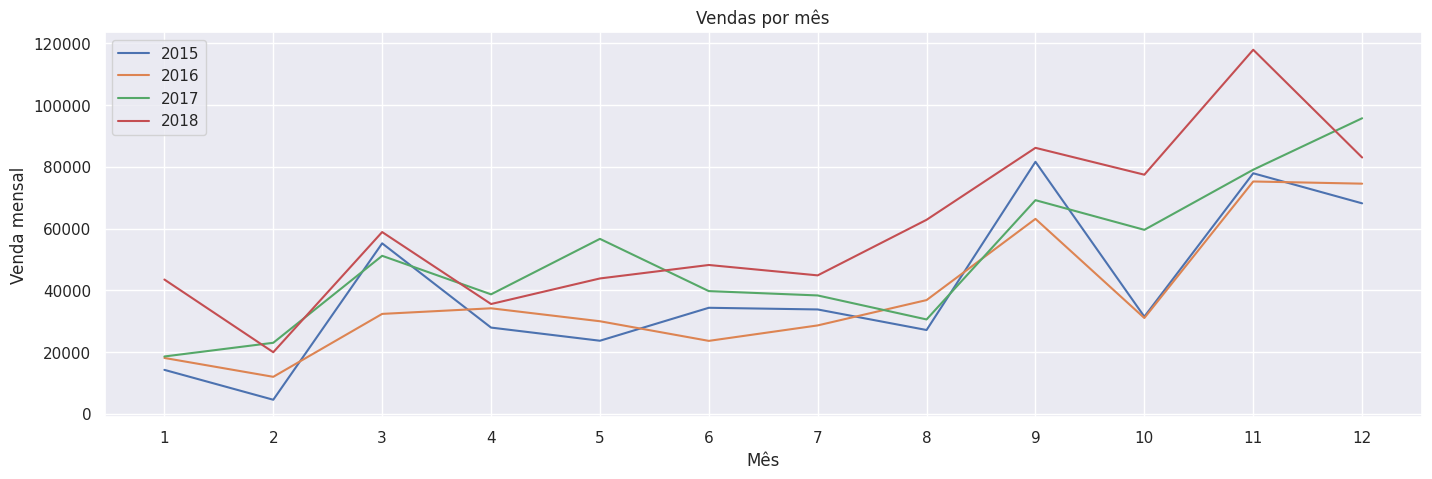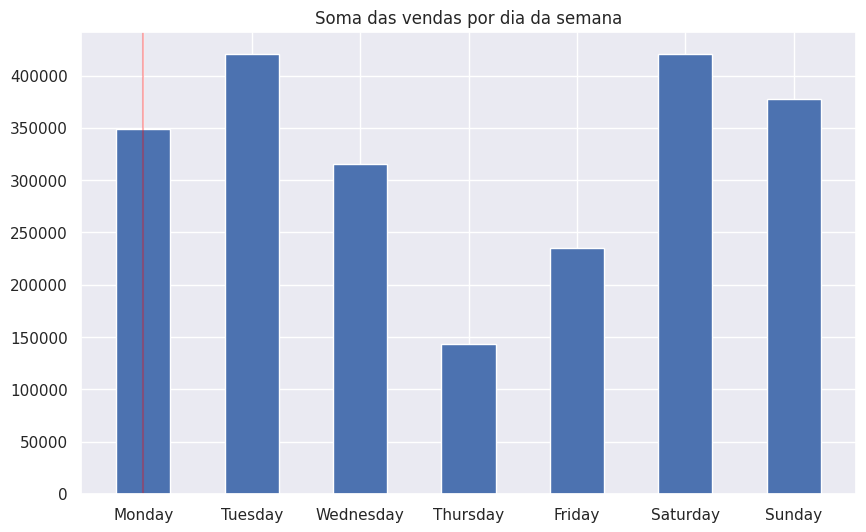

### Pré-processamento

O modelo precisa receber apenas duas colunas: ds e y, onde a primeira é a data e a segunda é o atributo alvo.

In [38]:
df_p = df_raw.copy()

# Cria a coluna de data a partir das colunas de ano, mês e dia
df_p['ds'] = [datetime.date(a[0], a[1], a[2]) for a in
              zip(df_p['Year'], df_p['Month'], df_p['Day'])]
df_p.rename(columns={'soma das vendas': 'y'}, inplace=True)
df_p = df_p[['ds', 'y']]
df_p.head()

,ds,y
0,2015-01-10,54.830
1,2015-01-11,9.940
2,2015-01-12,0.000
3,2015-01-13,3553.795
4,2015-01-14,61.960


### Treinamento

Instancia-se o modelo e passam-se todos os dados para treinamento.

In [39]:
np.random.seed(seed)

# Instancia e treina o modelo Prophet
if TRAIN_MODEL == 1:
  model_p = Prophet()
  model_p.fit(df_p)
  joblib.dump(model_p, 'prophet_model.pkl')

else:
  base_model_url = 'https://raw.githubusercontent.com/flaviohds/MVP_Machine_Learning/main/models_p1/'
  model_p = joblib.load(urlopen(base_model_url+'prophet_model.pkl'))

### Resultado e avaliação do modelo

Plotando os resultados.

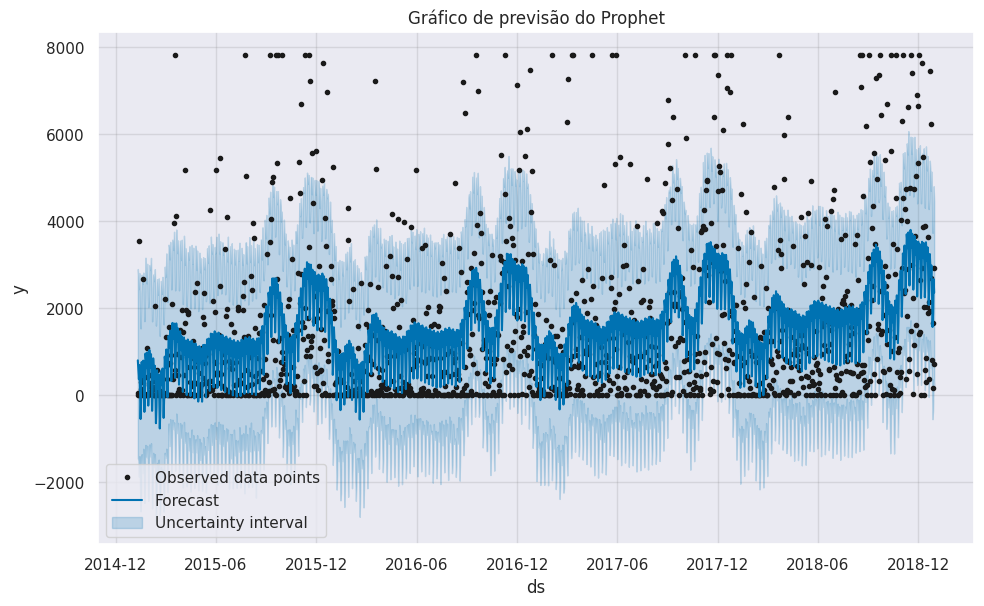

In [40]:
predicted_p = model_p.predict(df_p)
model_p.plot(predicted_p)
plt.title('Gráfico de previsão do Prophet')
plt.legend()
plt.show()

Nota-se que o modelo não conseguiu se ajustar muito devido à grande variação dos dados. A região de incerteza do modelo é maior que 50% do valor máximo e o modelo não conseguiu prever nenhum ponto de pico acima de 4000.

Observando uma região específica para visualizar melhor:

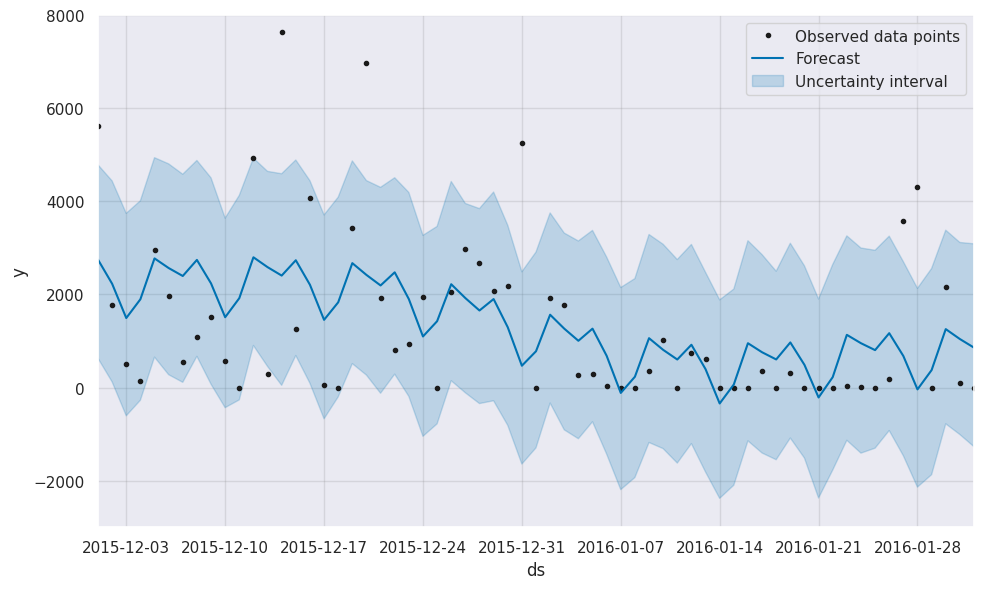

In [41]:
predicted_p = model_p.predict(df_p)
model_p.plot(predicted_p)
plt.axis([datetime.date(2015,12,1), datetime.date(2016,2,1), -3000, 8000])
plt.legend()
plt.show()

Nota-se que o Prophet dá uma ênfase maior na sazonalidade dos dados. No primeiro gráfico é possível notar a sazonalidade anual da previsão, e neste gráfico acima nota-se a sazonalidade semanal. Mesmo assim, fica claro que a previsão não consegue acompanhar a grande variação dos dados reais. Dito isso, o Prophet reconhece a sua limitação frente aos dados e faz um bom trabalho em manter grande parte dos pontos dentro de seus limites de incerteza.

Por fim, afim de se comparar com o resultado dos modelos da seção anterior, verifica-se o erro do modelo.

In [42]:
df_pp = df_p.copy()

# Calcula o erro do Prophet nos dados passados para o treinamento
# yhat é o valor previsto pelo modelo
df_pp['predicted'] = predicted_p['yhat']
print('erro médio absoluto: ', mean_absolute_error(df_pp['y'], df_pp['predicted']))
print('erro médio quadrático: ', mean_squared_error(df_pp['y'], df_pp['predicted']))

erro médio absoluto:  1203.4678739449773
erro médio quadrático:  2778235.3952663154


O erro resultante é menor que o obtido na validação cruzada pelo conselho criado na seção anterior, mas pior do que o obtido na partição de teste. De qualquer forma, esses erros não podem ser diretamente comparados com o do nosso modelo, já que não foi feito o *holdout* para o Prophet. Como o Prophet precisa de uma série temporal sequencial, não é fácil realizar a partição em treino e teste.

De qualquer forma, este erro também está mais alto do que o esperado. Considerando o número de modelos diferentes testados até agora, é fácil afirmar que nossos dados são problemáticos. Mesmo assim, temos agora dois modelos capazes de prever as vendas diárias da loja.

---

## 1.5 Comparação entre os dois modelos

Agora que temos dois modelos diferentes, podemos compará-los ao plotar o valor observado pelos valores previstos.

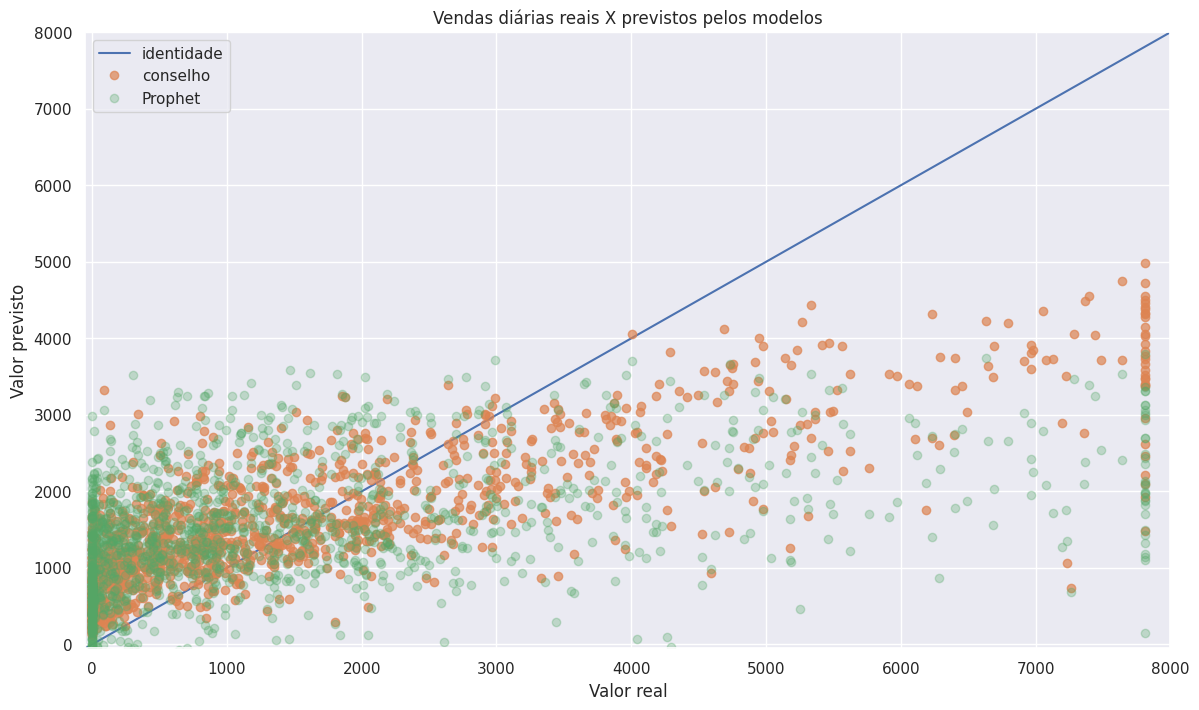

In [43]:
plt.figure(figsize=[14,8])

plt.plot([-50,8000], [-50,8000], label='identidade')
plt.plot(y2, y2_pred, 'o', label='conselho', alpha=0.7)
plt.plot(y2, predicted_p.yhat, 'o', label='Prophet', alpha=0.3)
plt.axis([-50, 8000, -50, 8000])
plt.title('Vendas diárias reais X previstos pelos modelos')
plt.xlabel('Valor real')
plt.ylabel('Valor previsto')
plt.legend()
plt.show()

No gráfico acima podemos ver que os dois modelos parecem convergir para a maioria dos valores. Também é mais fácil visualizar onde nossos modelos estão errando. Por exemplo, podemos ver que o modelo de conselho é um pouco melhor para prever picos de vendas, apesar de nunca prever valores acima de 5000. Mesmo assim, fica claro que ambos os modelos não são capazes de prever picos de vendas.

Como existem muitos pontos na área inicial do gráfico, é interessante ampliarmos essa parte:

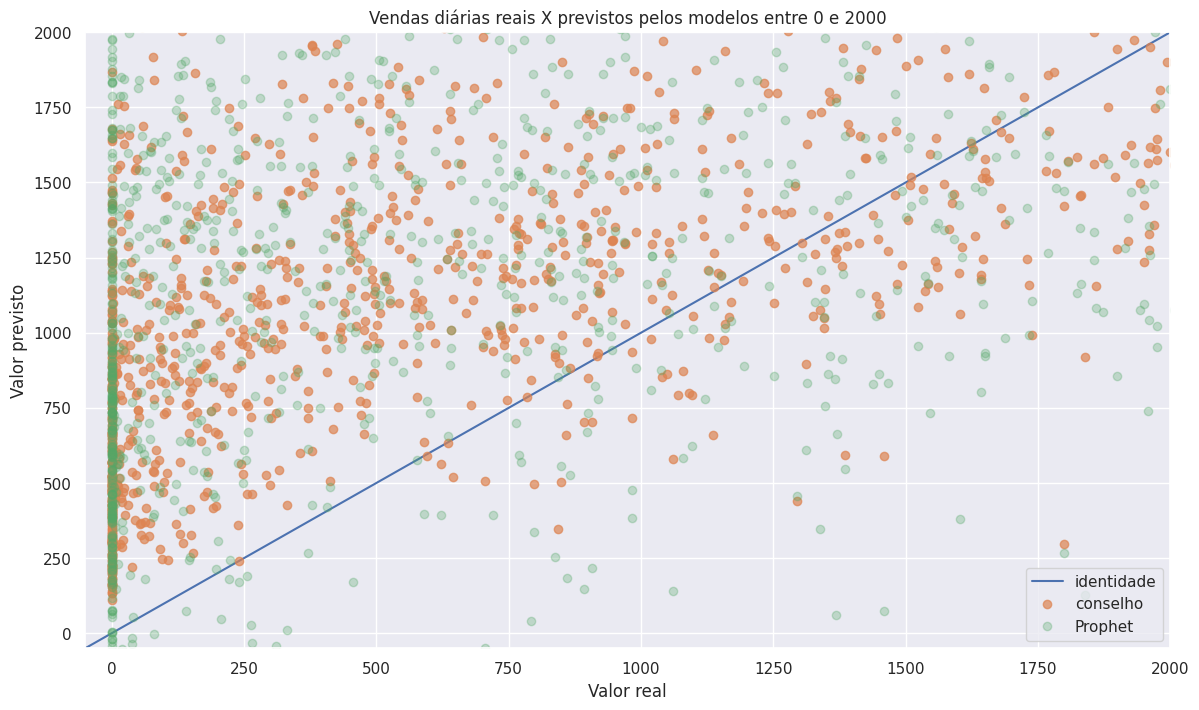

In [44]:
plt.figure(figsize=[14,8])

plt.plot([-50,8000], [-50,8000], label='identidade')
plt.plot(y2, y2_pred, 'o', label='conselho', alpha=0.7)
plt.plot(y2, predicted_p.yhat, 'o', label='Prophet', alpha=0.3)
plt.axis([-50, 2000, -50, 2000])
plt.title('Vendas diárias reais X previstos pelos modelos entre 0 e 2000')
plt.xlabel('Valor real')
plt.ylabel('Valor previsto')
plt.legend()
plt.show()

Neste gráfico, podemos ver que ambos os modelos não conseguem prever decentemente os dias que não há vendas ou com vendas muito baixas. A linha de valor real 0 provavelmente é responsável por grande parte do erro dos modelos, e claramente dificultou o aprendizado dos mesmos.

É importante ressaltar que esse problema já foi previsto desde o primeiro projeto, onde foi apontado que a loja não tinha fluxo de produtos o suficiente para diluir a aleatoriedade dos dados. Isso fez com que os modelos tivessem dificuldade em notar tendências já que, em alguns dias, por um mero acaso, nenhum produto foi vendido. Da mesma forma, o contrário também se fazia presente, onde aleatoriamente um cliente realizava uma compra equivalente à média de 5 dias da loja. Caso houvesse um fluxo maior de clientes e produtos, esses acasos tenderiam a diminuir.

---

## 1.6 Previsão dos últimos 7 dias e dos próximos 7 dias




Como temos duas ferramentas para prever os dados, será interessante plotar as duas ao lado dos dados reais para ver se a previsão dos dois modelos converge, e o quanto elas se assemelham ao valor real. Além disso, a proposta inicial deste MVP e do anterior era prever os 7 dias seguintes ao término dos dados.

Cria-se o dataframe e a previsão do Prophet para os 7 últimos e 7 próximos dias.

In [45]:
# A função do Prophet cria um dataframe vazio com apenas a data futura
df_f_p = model_p.make_future_dataframe(periods=7, freq='D')[-14:]

# A função de previsão cria um dataframe com todos os dados mostrados no gráfico
prophet_df = model_p.predict(df_f_p)
predicted_prophet = prophet_df[['ds', 'yhat']].copy()

Agora é a vez de prever os 7 últimos dias com o conselho.

In [46]:
df_f_e = df2[-7:].copy()

# Cria-se o vetor de entrada com o subset do dataset
x_f_e = df_f_e.drop('soma das vendas', axis=1).values
predicted_ensemble = chosen_model.predict(x_f_e)
predicted_ensemble

array([4320.01194787, 2896.48406968, 2626.62610213, 1172.12800103,
       2119.98179293, 2876.76718285, 2490.81535528])

Agora a previsão dos 7 próximos dias pelo conselho. Como o conselho requer mais atributos, teremos mais trabalho nessa parte. Primeiro, popula-se os atributos de data e os de dia da semana codificado. Lembrando que a descrição dos atributos (no início do MVP) contém as fontes com mais informações sobre o encoding trigonométrico utilizado para o dia da semana.

In [47]:
# Aproveitando o dataset criado pelo Prophet que tem a data
df_f_e = df_f_p[-7:].copy()
df_f_e['Month'] = pd.DatetimeIndex(df_f_e['ds']).month
df_f_e['year'] = pd.DatetimeIndex(df_f_e['ds']).year
df_f_e['day'] = pd.DatetimeIndex(df_f_e['ds']).day
df_f_e['day_of_week_sin'] = np.sin((pd.DatetimeIndex(df_f_e['ds']).weekday)* (2*np.pi/7))
df_f_e['day_of_week_cos'] = np.cos((pd.DatetimeIndex(df_f_e['ds']).weekday)* (2*np.pi/7))
df_f_e = df_f_e.reset_index(drop=True)

Agora temos que popular as colunas de *lag*.

In [48]:
# Guarda as vendas diárias dos 7 últimos dias em um vetor
past7days = df2[-7:]['soma das vendas'].copy()
past7days = past7days.reset_index(drop=True)

# Popula as colunas de lag com as vendas antigas
for i in range(7):      # Loop para cada linha
  for j in range(i,7):  # Loop para cada coluna
    df_f_e.at[i, 'vendas_t-'+str(j+1)] = past7days[6+i-j]

df_f_e

,ds,Month,year,day,day_of_week_sin,day_of_week_cos,vendas_t-1,vendas_t-2,vendas_t-3,vendas_t-4,vendas_t-5,vendas_t-6,vendas_t-7
0,2018-12-31,12,2018,31,0.000,1.000,713.79,2915.534,1657.351,177.636,814.594,2698.927,6233.054
1,2019-01-01,1,2019,1,0.782,0.623,NaN,713.790,2915.534,1657.351,177.636,814.594,2698.927
2,2019-01-02,1,2019,2,0.975,-0.223,NaN,NaN,713.790,2915.534,1657.351,177.636,814.594
3,2019-01-03,1,2019,3,0.434,-0.901,NaN,NaN,NaN,713.790,2915.534,1657.351,177.636
4,2019-01-04,1,2019,4,-0.434,-0.901,NaN,NaN,NaN,NaN,713.790,2915.534,1657.351
5,2019-01-05,1,2019,5,-0.975,-0.223,NaN,NaN,NaN,NaN,NaN,713.790,2915.534
6,2019-01-06,1,2019,6,-0.782,0.623,NaN,NaN,NaN,NaN,NaN,NaN,713.790


Como precisamos das colunas da previsão de um dia para prever o próximo, temos que prever as vendas e completar as colunas à medida que prevemos.

In [49]:
predicted=[]
for i in range(7):      # Loop para cada previsão
  x = df_f_e.drop('ds', axis=1).loc[i].values
  x = x.reshape(1, -1)
  y = chosen_model.predict(x)
  predicted.append(y[0])
  for j in range(6-i):  # Loop para popular cada coluna de lag com a previsão feita
    df_f_e.at[i+j+1, 'vendas_t-'+str(j+1)] = y    # Popula a diagonal

df_f_e['predicted'] = predicted
df_f_e

,ds,Month,year,day,day_of_week_sin,day_of_week_cos,vendas_t-1,vendas_t-2,vendas_t-3,vendas_t-4,vendas_t-5,vendas_t-6,vendas_t-7,predicted
0,2018-12-31,12,2018,31,0.000,1.000,713.790,2915.534,1657.351,177.636,814.594,2698.927,6233.054,2791.189
1,2019-01-01,1,2019,1,0.782,0.623,2791.189,713.790,2915.534,1657.351,177.636,814.594,2698.927,1880.077
2,2019-01-02,1,2019,2,0.975,-0.223,1880.077,2791.189,713.790,2915.534,1657.351,177.636,814.594,1108.564
3,2019-01-03,1,2019,3,0.434,-0.901,1108.564,1880.077,2791.189,713.790,2915.534,1657.351,177.636,788.938
4,2019-01-04,1,2019,4,-0.434,-0.901,788.938,1108.564,1880.077,2791.189,713.790,2915.534,1657.351,1319.067
5,2019-01-05,1,2019,5,-0.975,-0.223,1319.067,788.938,1108.564,1880.077,2791.189,713.790,2915.534,1432.392
6,2019-01-06,1,2019,6,-0.782,0.623,1432.392,1319.067,788.938,1108.564,1880.077,2791.189,713.790,1652.842


Finalmente, temos todos os dias previstos pelo conselho.

Agora que temos todos os dados que queremos, podemos criar nosso dataframe com a data, previsão do Prophet, previsão do conselho, e dias observados (para os 7 últimos dias observados).

In [50]:
# Junta a previsão do conselho dos últimos 7 dias e dos 7 dias futuros
predicted_ensemble = list(predicted_ensemble) + predicted

# Aproveita o dataframe do Prophet e popula com as listas e valores faltantes necessários
df_predicted = predicted_prophet.copy()
df_predicted['Ensemble'] = predicted_ensemble
df_predicted['observed'] = list(past7days.values)+[None, None, None, None,
                                                   None, None, None]
df_predicted.rename(columns={'ds': 'date', 'yhat': 'Prophet'}, inplace=True)
df_predicted

,date,Prophet,Ensemble,observed
0,2018-12-24,2722.173,4320.012,6233.054
1,2018-12-25,2983.167,2896.484,2698.927
2,2018-12-26,2389.116,2626.626,814.594
3,2018-12-27,1569.478,1172.128,177.636
4,2018-12-28,1882.836,2119.982,1657.351
5,2018-12-29,2665.940,2876.767,2915.534
6,2018-12-30,2360.901,2490.815,713.790
7,2018-12-31,2090.078,2791.189,NaN
8,2019-01-01,2335.830,1880.077,NaN
9,2019-01-02,1734.154,1108.564,NaN


Nota-se que os dois modelos apresentam valores próximos entre si na maioria das vezes. Ao mesmo tempo, dos 7 dias observados, apenas 3 deles foram previstos com um erro menor do que 800.

Para visualizar melhor, podemos plotar nossos dados em um único gráfico:

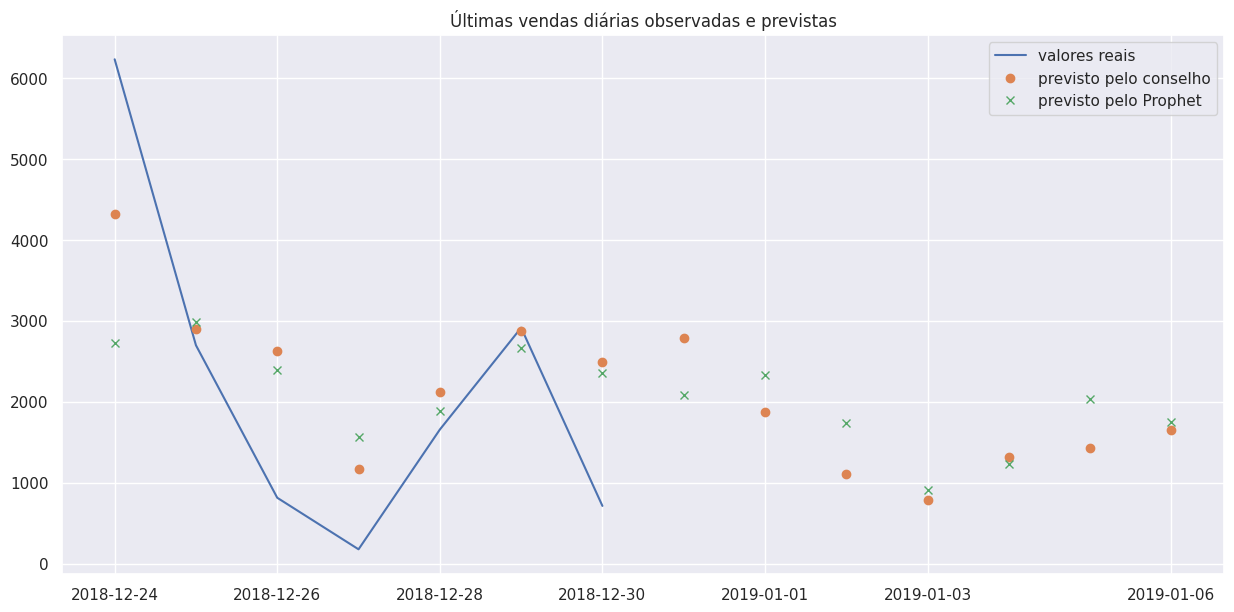

In [51]:
plt.figure(figsize=[15,7])

plt.plot(df_predicted.date, df_predicted.observed, label='valores reais')
plt.plot(df_predicted.date, df_predicted.Ensemble, 'o', label='previsto pelo conselho')
plt.plot(df_predicted.date, df_predicted.Prophet, 'x', label='previsto pelo Prophet')

# Seta os marcadores de data no eixo X
plt.xticks([datetime.date(2018, 12, 24), datetime.date(2018, 12, 26),
            datetime.date(2018, 12, 28), datetime.date(2018, 12, 30),
            datetime.date(2019, 1, 1), datetime.date(2019, 1, 3),
            datetime.date(2019, 1, 6)])

plt.title('Últimas vendas diárias observadas e previstas')
plt.legend()
plt.show()

Podemos ver que nesses últimos 7 dias observados (2018/12/24 a 2018/12/30), os dois modelos acertaram a tendência dos dados reais. Na maioria dos pontos, os modelos previram quando as vendas cairiam e quando elas cresceriam, mesmo que não tenham conseguido acompanhar a magnitude dessas mudanças. A grande excessão é o primeiro ponto, onde o Prophet errou muito em relação ao valor real.

Em relação aos 7 dias futuros (2018/12/31 a 2019/01/06), é interessante notar que os dois modelos concordam com a maioria dos valores diários. Com excessão de 2018/12/31, os dois modelos tem uma discrepância menor do que 600 dólares em cada dia. Mesmo considerando que os modelos possuem erros médios altos, **parece seguro afirmar que a semana seguinte será uma semana com menos vendas do que a última observada.**

---

## 1.7 Conclusão

Nesta primeira parte do MVP foi construído um modelo de machine learning para o problema regressão e, mais especificamente, de previsão de série temporal relativo às vendas diárias de um site. Apesar de os dados serem ruidosos e insuficientes, como foi apontado no [trabalho anterior](https://colab.research.google.com/drive/18IbiSGZq93gUoOOAWgPGpZfT-E8HHNPz?usp=sharing), o modelo feito parece ser capaz de prever as tendências de aumento ou queda nos dias futuros. Mesmo assim, fica claro que o modelo tem dificuldade de prever precisamente os valores exatos de vendas diárias, principalmente em dias de pico.

Para achar o modelo resultante, foram utilizadas técnicas de holdout, *pipeline*, redimensionamento, validação cruzada, autocorrelação, feature selection, busca de hiperparâmetros com gridsearch, conselho de modelos e experimentação com diferentes configurações de atributos. O erro utilizado para a busca de modelo e hiperparâmetros foi o erro quadrático médio, afim de penalizar erros grosseiros pontuais. Além disso, o trabalho anterior realizou várias operações de pré-processamento.

Resumidamente, o modelo consiste em um conselho de peso não uniforme com um KNN, uma ElasticNet e um RandomForest. Os atributos utilizados consistem em atributos de data e as vendas dos dias anteriores. Todas as informações sobre o modelo podem ser obtidas no final da seção de [Descrição do modelo final](https://colab.research.google.com/drive/1bV7mV7KT1JuwP1OWms616Vu6A8XAAVDz#scrollTo=Descri_o_do_modelo_final).

O modelo apresentou um MSE de 2513302 e um erro médio absoluto (MAE) de 1160 nos dados de teste. Este MAE equivale a 78% do valor médio dos dados observados, indicando que ocorreu *underfitting*. Afim de verificar a fonte do problema, os dados foram testados no modelo de referência, o Facebook Prophet. O Prophet obteve um MSE de 2778235 e um MAE de 1203 em seus dados de treinamento. Estes fatos apontam para um problema nos dados.

Por fim, concluiu-se que, devido aos dados ruidosos e insuficientes, não é recomendado utilizar o modelo para previsão do valor exato de vendas diárias. Mesmo assim, a previsão de uma tendência de aumento ou diminuição de vendas ainda é uma ferramenta poderosa para o dia a dia de empresas que precisam balancear gastos, lucros e metas.

---
---

---
# <center> Parte 2: Processamento de linguagem natural com Deep Learning
---

## 2.1 Introdução

Em um mundo cada vez mais digital, a quantidade de dados gerado e o interesse de empresas nesses dados cresce exponencialmente. Considerando essa constante mudança, é natural as empresas não terem capacidade de analisar e realizar previsões bem fundamentadas, pelo menos não tão rápido quanto elas gostariam. É nessa necessidade que se encaixa o machine learning.

Em problemas comuns com dados estruturados o machine learning clássico é capaz de realizar previsões muito boas. Porém, em problemas com dados não estruturados e matematicamente complexos, uma regressão linear ou árvore de decisão simples não é capaz de obter resultados satisfatórios. O problema de processamento de linguagem natural (NLP) é um desses casos em que os algoritmos de machine learning clássico têm dificuldade. Com o avanço da área de redes neurais, nascem os algoritmos de deep learning, que se mostram cada vez mais capazes de tratar de problemas de NLP. Porém, esse tipo de algoritmo apresenta um grande problema. Frente à complexidade do algoritmo e seu grande número de variáveis a serem ajustadas, é necessária uma grande quantidade de dados.

O problema em si não é a quantidade de dados, já que o mundo digital gera mais dados do que se é capaz de armazenar, mas sim a necessidade de rotular esses dados. Considerando o volume de dados necessário para o treinamento de uma rede de deep learning, a tarefar de rotular milhares de frases passa a ser muito custosa. Surge então a ideia de reduzir este problema utilizando dados rotulados pelos próprios usuários em reviews de produtos para treinamento.

---

## 2.2 Descrição do problema

Este MVP utilizará uma base de reviews de produtos para treinar um modelo que seja capaz de prever a nota dada para o produto baseado no texto do review. Além disso, no final do projeto este modelo será testado para dar uma nota para tweets simulados que falem sobre o desempenho dos produtos e satisfação do consumidor. Ou seja, o objetivo do projeto é realizar um breve estudo da capacidade de transferência de tarefa de prever notas de um review para análise de sentimento de tweets, desde que dentro do mesmo escopo de satisfação de um cliente com um produto. A ideia é apresentar uma possível solução para o problema de falta de rótulos enfrentado por empresas de varejo ao monitorar reações do público em redes sociais.

O modelo não será treinado do zero. Considerando a quantidade de dados necessária para um modelo de NLP aprender a relação de cada palavra existente em uma língua, foi escolhido pegar o modelo base do [Google BERT](https://huggingface.co/bert-base-cased). Porém, será realizado um treinamento de fine-tuning em cima do dataset de reviews. Toda a vez que for mencionado "treinamento" ou "treino" neste notebook, estará se referindo ao treinamento de fine-tunning que será realizado na seção 2.5, enquanto o treinamento do zero (feito pelo grupo google, [que utilizou mais de 800 milhões de palavras](https://www.analyticssteps.com/blogs/history-importance-and-use-cases-bert-model#:~:text=The%20first%20version%20of%20the,of%20these%20models%20are%20enormous!)) do BERT será referido como pré-treinamento.

O [dataset utilizado](https://huggingface.co/datasets/amazon_reviews_multi) contém informações sobre reviews de produtos da amazon. Os reviews se apresentam em 6 possíveis línguas e 31 possíveis categorias de produto. Afim de relacionar as duas partes do MVP, o dataset será filtrado apenas para reviews na língua inglesa e de categorias parecidas com as presentes na primeira parte.

Os atributos do dataset são:

- **review_id**: identificador do review (string)
- **product_id**: identificador do produto (string)
- **reviewer_id**: identificador do consumidor (string)
- **stars**: nota dada pelo consumidor para o produto (inteiro, discreto, 1-5)
- **review_body**: o corpo do review (string)
- **review_title**: o título do review (string)
- **language**: sigla da língua em que o review se encontra (string)
- **product_category**: categoria do produto do review (string)

---

## 2.3 Filtragem prévia do dataset e breve análise dos dados

O [dataset](https://huggingface.co/datasets/amazon_reviews_multi) foi carregado e filtrado em um [notebook separado](https://colab.research.google.com/drive/1vJ9PfVA9-vChhwNRTBpqmyQU0SCnlWIZ?usp=sharing), afim de reduzir o tempo de execução deste notebook principal. No notebook de filtragem, foram aproveitados apenas os reviews em inglês de produtos que se encaixavam nas categorias vistas no [primeiro MVP](https://colab.research.google.com/drive/18IbiSGZq93gUoOOAWgPGpZfT-E8HHNPz?usp=sharing) e explicitadas na primeira parte deste notebook (eletrônicos, mobília e material de escritório). As categorias do dataset da amazon utilizadas foram: home, wireless, home_improvement, pc, electronics, office_product, furniture, camera, video_games e watch.

Os datasets de treino, validação e teste foram salvos e podem ser encontrados no [github do MVP](https://github.com/flaviohds/MVP_Machine_Learning) com os nomes de NLP_df_train.csv, NLP_df_validation.csv e NLP_df_test.csv, respectivamente.

Começa-se carregando os dados filtrados.

In [52]:
# Os dataframes serão organizados em um dicionário
df_raw = {}

# Carregando os dataframes do github do projeto
base_url = 'https://raw.githubusercontent.com/flaviohds/MVP_Machine_Learning/main/'
df_raw['train'] = pd.read_csv(base_url+'NLP_df_train.csv', index_col=0)
df_raw['validation'] = pd.read_csv(base_url+'NLP_df_validation.csv', index_col=0)
df_raw['test'] = pd.read_csv(base_url+'NLP_df_test.csv', index_col=0)

Agora que carregamos os datasets, podemos começar a verificar a organização dos nossos dados.

In [53]:
# Verificando o número de observações em cada partição
print('observações de treino: ', df_raw['train'].shape[0])
print('observações de validação: ', df_raw['validation'].shape[0])
print('observações de teste: ', df_raw['test'].shape[0])

observações de treino:  65299
observações de validação:  1560
observações de teste:  1603


Nota-se um número muito grande de reviews no dataset de treino. Provavelmente não será possível utilizar todo o dataset no treinamento.

Será interessante ver o dataframe de treino como um todo e verificar se temos linhas duplicadas ou valores nulos.

In [54]:
df_raw['train']

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,en_0964290,product_en_0740675,reviewer_en_0342986,1,Arrived broken. Manufacturer defect. Two of th...,I'll spend twice the amount of time boxing up ...,en,furniture
1,en_0690095,product_en_0440378,reviewer_en_0133349,1,the cabinet dot were all detached from backing...,Not use able,en,home_improvement
2,en_0311558,product_en_0399702,reviewer_en_0152034,1,I received my first order of this product and ...,The product is junk.,en,home
3,en_0044972,product_en_0444063,reviewer_en_0656967,1,This product is a piece of shit. Do not buy. D...,Fucking waste of money,en,wireless
4,en_0784379,product_en_0139353,reviewer_en_0757638,1,went through 3 in one day doesn't fit correct ...,bubble,en,pc
...,...,...,...,...,...,...,...,...
65294,en_0689115,product_en_0879422,reviewer_en_0482175,5,I loved this doorbell. Worked very well in our...,I loved this doorbell,en,home_improvement
65295,en_0982040,product_en_0640040,reviewer_en_0210391,5,The colors are bright and fits the bed nice,Hi,en,home
65296,en_0297888,product_en_0125756,reviewer_en_0645859,5,Love this! Put this on the wall above my bed a...,Five Stars,en,home
65297,en_0589358,product_en_0402982,reviewer_en_0199163,5,Replaced my battery with it. Works like new.,This works,en,wireless


Temos diversos atributos que seriam úteis em uma análise mais profunda dos dados. Porém, para o objetivo desse projeto, utilizaremos apenas os atributos de corpo do review e o atributo alvo de estrelas dadas pelo usuário.

In [55]:
# Verificando linhas duplicadas
df_raw['train'].duplicated().value_counts()

False    65299
dtype: int64

Nenhuma linha duplicada encontrada.

In [56]:
# Verificando valores nulos e retornando a linha onde se encontram
df_raw['train'][df_raw['train'].isnull().any(axis=1)]

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
1356,en_0584273,product_en_0593276,reviewer_en_0270470,1,I never received your product.,NaN,en,camera
13097,en_0363452,product_en_0991504,reviewer_en_0350541,1,Garbage!!!!!! Do not buy!!!!!! Very bad recept...,NaN,en,electronics
17416,en_0684361,product_en_0827066,reviewer_en_0375788,2,They r nice but they don’t stay in the ears,NaN,en,wireless
23897,en_0342117,product_en_0720417,reviewer_en_0712502,2,Nice modern farmhouse touch to decor. Color is...,NaN,en,furniture
29828,en_0678684,product_en_0531413,reviewer_en_0033052,3,Easy to assemble just be aware that when screw...,NaN,en,furniture
37658,en_0216864,product_en_0116972,reviewer_en_0323091,3,I don't have a review for this product as I ha...,NaN,en,video_games
52642,en_0958193,product_en_0927553,reviewer_en_0358321,5,"Watch band and case works great, mine cracked ...",NaN,en,wireless
52827,en_0523164,product_en_0595195,reviewer_en_0533312,5,It was very nice!! Loving it!,NaN,en,wireless
55867,en_0441023,product_en_0580596,reviewer_en_0108372,5,"My husband love this cover for his ipad,",NaN,en,pc
60003,en_0978799,product_en_0138960,reviewer_en_0354304,5,Very Happy with purchase,NaN,en,wireless


Os únicos valores nulos encontrados foram na coluna de título do review. Como temos muitas observações, seria válido remover essas linhas. Porém, como não utilizaremos esta coluna para treinamento do modelo, podemos ignorar esses valores nulos.

Também é importante conferir se o notebook de filtragem retirou todas as línguas e tipos de produtos indesejados.

In [57]:
df_raw['train'].language.value_counts()

en    65299
Name: language, dtype: int64

In [58]:
df_raw['train'].product_category.value_counts()

home                17679
wireless            15717
home_improvement     7136
pc                   6401
electronics          6186
office_product       5521
furniture            2984
camera               2139
video_games           775
watch                 761
Name: product_category, dtype: int64

Aparentemente, os dados estão de acordo com o esperado.

É importante lembrar que, apesar de o dataset originário estar balanceado, realizamos alguns filtros, o que pode causar desbalanceamento do dataset em relação ao atributo alvo 'stars'.

In [59]:
df_raw['train'].stars.value_counts(sort=False)

1    14418
2    13561
3    12370
4    12117
5    12833
Name: stars, dtype: int64

Temos um leve desbalanceamento. Trataremos isso na próxima seção.

Para finalizar a análise, será interessante verificar o tamanho dos diferentes corpos de review.

In [60]:
# Matriz de partição X número de palavras em cada observação
number_words_matrix = []

for key in df_raw.keys():
  # Guarda o tamanho de cada observação em uma lista e armazena na matriz
  number_words_list = [len(x.split()) for x in df_raw[key].review_body.to_list()]
  number_words_matrix.append(number_words_list)

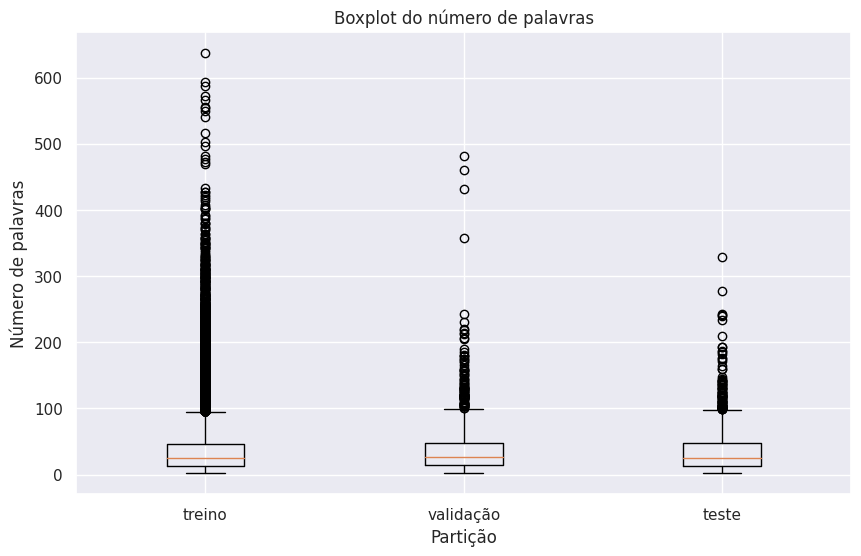

In [61]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.boxplot(number_words_matrix)
ax1.set(
        title='Boxplot do número de palavras',
        xlabel='Partição',
        ylabel='Número de palavras',
        )
ax1.set_xticklabels(['treino','validação','teste'])
plt.show()

Nota-se que existe uma grande variação no número de palavras em cada review, variando de menos de 10 até mais de 600. Essa variação pode causar problemas para o modelo, já que ele precisa lidar com vetores de tamanho 'fixo'. Além disso, é fácil de se imaginar que após certo número de palavras, o sentimento expresso por cada frase acaba se repetindo, fazendo com que pouco informação nova seja adicionada por frases no final do review.

---

## 2.4 Pré-processamento

Nesta seção trataremos os dados em relação aos problemas vistos até agora e em especificidades que o modelo utilizado requer.

### Ajuste dos atributos relevantes

Primeiramente, removeremos os atributos que não serão utilizados pelo modelo. Os únicos atributos que necessitamos são o número de estrelas dadas pelo usuário e o texto do review do produto.

Além disso, aproveitaremos para fazer duas mudanças necessárias para o modelo. A primeira é a modificação da nossa variável alvo de 1 a 5, para 0 a 4. A segunda modificação é a alteração dos nomes das colunas para 'text' e 'label'.

Todas essas mudanças serão realizadas nos dataframes de treino, validação e teste.

In [62]:
df = {}
for key in df_raw.keys():
  # É necessário criar uma cópia por conta do funcionamento interno das
  # variáveis no pandas/python. As mudanças serão feitas nessa cópia afim
  # de manter uma versão do dataframe original.
  df[key] = df_raw[key].copy()
  df[key] = df[key].drop(['review_id','product_id','reviewer_id','review_title',
                          'language','product_category'], axis=1)
  df[key].stars.replace({1: 0, 2: 1, 3: 2, 4: 3, 5: 4}, inplace=True)
  df[key].rename(columns={'stars': 'label', 'review_body': 'text'}, inplace=True)

Visualizando o dataframe de treino resultante:

In [63]:
df['train']

,label,text
0,0,Arrived broken. Manufacturer defect. Two of th...
1,0,the cabinet dot were all detached from backing...
2,0,I received my first order of this product and ...
3,0,This product is a piece of shit. Do not buy. D...
4,0,went through 3 in one day doesn't fit correct ...
...,...,...
65294,4,I loved this doorbell. Worked very well in our...
65295,4,The colors are bright and fits the bed nice
65296,4,Love this! Put this on the wall above my bed a...
65297,4,Replaced my battery with it. Works like new.


### Balanceamento

O desbalanceamento visto foi de menos de 13% na pior das classes, o que provavelmente não seria o suficiente para enviesar consideravelmente o treino do modelo. Porém, como temos mais amostras de treino do que será possível utilizar, é interessante balancear as classes. Além disso, balancear os datasets agora é mais simples do que forçar um balanceamento no treino do modelo.

Como não estamos preocupados com perder de algumas amostras, o balanceamento escolhido será feito pela remoção de observações até atingirmos o valor da classe menos representada (no caso do dataset de treino: 4 estrelas, 12117 observações).

In [64]:
# Para garantir a reprodutibilidade da célula
np.random.seed(seed)

df_balanced = {}

# Loop para cada partição. Calcula qual classe é menos representada
for key in df.keys():
  label_count = df[key].label.value_counts(sort=False)
  minimum_count = min(label_count)
  df_balanced[key] = df[key].copy()
  # Loop para cada classe. Calcula número de observações a serem removidas,
  # escolhe os índices e remove do novo dataset.
  for label, count in zip(label_count.index, label_count):
    n_to_remove = count - minimum_count
    df_label = df[key][df[key].label == label]
    indexes_to_remove = np.random.choice(df_label.index, n_to_remove, replace=False)
    df_balanced[key].drop(indexes_to_remove, inplace=True)

  # Reseta o índice e printa os valores das classes do novo dataset
  df_balanced[key].reset_index(drop=True, inplace=True)
  print(key, 'label count:')
  print(df_balanced[key].label.value_counts(sort=False))
  print('')


# # modo alternativo deixado aqui para referência futura
# g = df['train'].groupby('label', group_keys=False)
# g = g.apply(lambda x: x.sample(g.size().min())).reset_index(drop=True)
# g

train label count:
0    12117
1    12117
2    12117
3    12117
4    12117
Name: label, dtype: int64

validation label count:
0    269
1    269
2    269
3    269
4    269
Name: label, dtype: int64

test label count:
0    295
1    295
2    295
3    295
4    295
Name: label, dtype: int64



Agora todos os datasets estão balanceados.

### Amostragem

Como foi mencionado anteriormente, nosso dataset é bem maior do que esperado. Obviamente, seria interessante ter a maior quantidade possível de dados para treinamento e validação, mas, infelizmente, não temos tempo e memória computacional ilimitada.

Como utilizaremos apenas uma época e tamanho de batch limitado, ficaremos limitados ao número de observações de treino $T = batch \times steps$. A vantagem de pegar uma amostragem da partição de treino agora é que conseguimos garantir que o treino visto pelo modelo seja estratificado. Após alguns testes, o treinamento que melhor obteve resultados foi com um batch de 128 e 240 steps, resultando em um total de 30720 observações de treino. Esta decisão de batch e steps é mais discutida na seção de treinamento do modelo.

Em relação ao conjunto de validação, temos um problema similar com o tempo de processamento. Teoricamente, um número muito grande de observações para validação garante que a nossa validação seja heterogênea. Porém, na prática, a validação também aumenta o tempo computacional do treino, já que ela é feita várias vezes, afim de guardar o modelo que obteve maior acurácia ao longo do treino. Também realizaremos uma amostragem estratificada para garantir o balanceamento das classes na validação.

In [65]:
np.random.seed(seed)

df_sample = {}

# Número de observações que serão vistas no treino
batch_size = 128
steps = 240
T = batch_size*steps

# Pega N amostras de cada classe em cada partição
df_sample['train'] = df_balanced['train'].groupby("label", group_keys=False).apply(lambda x:x.sample(int(T/5)))
df_sample['validation'] = df_balanced['validation'].groupby("label", group_keys=False).apply(lambda x:x.sample(64))
df_sample['test'] = df_balanced['test'].groupby("label", group_keys=False).apply(lambda x:x.sample(100))

print('observações da amostragem de treino: ', df_sample['train'].shape[0])
print('observações da amostragem de validação: ', df_sample['validation'].shape[0])
print('observações da amostragem de teste: ', df_sample['test'].shape[0])

observações da amostragem de treino:  30720
observações da amostragem de validação:  320
observações da amostragem de teste:  500


Verificando se a amostragem de treino tem as classes balanceadas:

In [66]:
df_sample['train']['label'].value_counts()

0    6144
1    6144
2    6144
3    6144
4    6144
Name: label, dtype: int64

### Demais pré-processamentos de NLP

É neste ponto que aplicaríamos técnicas comuns específicas de NLP. Porém, como será mostrado na seção de resultados, estas técnicas não melhoraram a acurácia do modelo. De qualquer forma, os principais pré-processamentos utilizados foram:

- Remoção de stop-words. Seriam retiradas palavras que servem apenas para estruturar uma frase, mas não adicionam contexto ao review. Por exemplo, artigos, pronomes e verbos auxiliares tendem a não alterar a intenção das frases.

- Remoção de caracteres especiais (%, #, =, &, etc.). Caracteres especiais raramente são relevantes e são incomuns o suficiente para o modelo não conseguir aprender nada de útil com eles.

- Lematização. A redução das palavras à sua palavra originária (é → ser) tende a reduzir a quantidade de palavras necessárias a serem aprendidas.

- Remoção de acentos. Apesar de ser incomum na língua inglesa, o ato de colocar ou não colocar um acento erroneamente faz com que o modelo veja aquilo como duas palavras diferentes.

- Expansão de contrações (you've → you have). Muito comum em inglês, as contrações também resultam em mais palavras a serem aprendidas, já que o modelo trata a contração como uma palavra nova.

- Remoção de letras maiúsculas. Outro método de remover diversas apresentações da mesma palavra.

Como esses pré-processamentos não apresentaram resultados satisfatórios, os pacotes, funções e comandos serão apresentados na célula seguinte dentro de um 'if', afim de não aumentar o tempo de execução do notebook.

Caso o leitor deseje realizar esses pré-processamentos, basta mudar 'other_preprocessing' para 'True' na célula abaixo.

In [67]:
# Mude esta variável para realizar os pré-processamentos citados
################################################################
other_preprocessing = False
################################################################


if other_preprocessing == True:

  # Código retirado de https://drive.google.com/file/d/1gSvg5kZrKywZuh1HGC_wxPFMz4tG9aDZ/view?usp=sharing
  # Originalmente feito pelo Laboratório de inteligência Artificial da PUC-Rio
  # Baseado no livro Practical Machine Learning with Python
  # Modificado por Flávio Horsth De Seta

  import nltk
  import spacy
  !python -m spacy download en_core_web_md -q
  !python -m spacy link en_core_web_md en -q
  from nltk.tokenize.toktok import ToktokTokenizer
  import re
  from bs4 import BeautifulSoup
  !pip install contractions -q
  from contractions import contractions_dict
  import unicodedata
  nltk.download('wordnet')
  from nltk.stem import WordNetLemmatizer

  # Carrega tokenizador e lista de stopwords
  nlp = spacy.load('en_core_web_sm')
  tokenizer = ToktokTokenizer()
  nltk.download('stopwords')
  stopword_list = nltk.corpus.stopwords.words('english')

  # Carrega o lemmatizador
  lemmatizer = WordNetLemmatizer()

  # Remove stopwords
  def remove_stopwords(text):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

  # Lematização
  def lemmatize(text):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

  # Stemming
  def stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

  # Remove caracteres especiais
  def remove_special_characters(text, remove_digits=False):
    special_char_pattern = re.compile(r'([{.(-)!}])')
    text = special_char_pattern.sub(" \\1 ", text)

    pattern = r'[^a-zA-z0-9\s]'
    text = re.sub(pattern, '', text)
    return text

  # Expandir contrações
  def expand_contractions(text, contraction_mapping=contractions_dict):
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match) \
            if contraction_mapping.get(match) \
            else contraction_mapping.get(match.lower())
        expanded_contraction = first_char + expanded_contraction[1:]
        return expanded_contraction

    try:
      expanded_text = contractions_pattern.sub(expand_match, text)
      expanded_text = re.sub("'", "", expanded_text)
    except:
      return text
    return expanded_text

  # Remove acentos
  def remove_accent(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

  # Remove links
  def strip_html_tags(text):
    text = re.sub(r"http[s]?://\S+", "", text)
    text = re.sub(r"\s+", " ", text)
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text


  # Funções para limpar texto: chama todas as funções declaradas acima e faz mais alguns pré processamentos
  def clean(corpus, links=True, accents=True, contractions=True, upper=True,
            lines=True, lemmatizer=True, stemmer=False, special_characters=True,
            stopwords=True):

    normalized_corpus = []
    for doc in corpus:

      if links==True:
        # remove links
        doc = strip_html_tags(doc)

      if accents==True:
        # remove acentuação
        doc = remove_accent(doc)

      if contractions==True:
        # expandir contrações
        doc = expand_contractions(doc)
        # doc = list(cont.expand_texts(doc, precise=True))

      if upper==True:
        # coloca tudo em caixa baixa
        doc = doc.lower()

      if lines==True:
        # remove linhas em branco
        doc = re.sub(r'[\r|\n|\r\n]+', ' ', doc)
        doc = re.sub(' +', ' ', doc)

      if lemmatizer==True:
        # lemmatização
        doc = lemmatize(doc)

      if stemmer==True:
        # stemming
        doc = stemmer(doc)

      if special_characters==True:
        # remove caracteres especiais
        doc = remove_special_characters(doc)

      if stopwords==True:
        # remove stopwords
        doc = remove_stopwords(doc)

      # insere na lista o texto após limpeza
      normalized_corpus.append(doc)

    return normalized_corpus # retorna corpus pré processado

  df_sample['train']['text'] = clean(df_sample['train']['text'])
  df_sample['validation']['text'] = clean(df_sample['validation']['text'])
  df_sample['test']['text'] = clean(df_sample['test']['text'])

  print(' ')
  print('Exemplo de como ficou um texto:')
  print(df_sample['train'].head(1).text.values)

### Tokenização

Agora que a maioria das modificações foi feita, podemos começar a passar os dados para o formato pedido pelos modelos do Hugging Face.

In [68]:
dataset = {}

# Instancia os objetos de dataset, requisitados pelos modelos do HuggingFace
for key in df_sample.keys():
  dataset[key] = Dataset.from_pandas(df_sample[key])

dataset

{'train': Dataset({
     features: ['label', 'text', '__index_level_0__'],
     num_rows: 30720
 }),
 'validation': Dataset({
     features: ['label', 'text', '__index_level_0__'],
     num_rows: 320
 }),
 'test': Dataset({
     features: ['label', 'text', '__index_level_0__'],
     num_rows: 500
 })}

Agora, passamos o dataset pelo tokenizador do modelo BERT.

In [69]:
# Carrega do tokenizador do BERT
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

# Função que tokeniza uma frase
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

# Aplica a função tokenizadora em cada partição
tokenized_train_dataset = dataset['train'].map(tokenize_function, batched=True)
tokenized_validation_dataset = dataset['validation'].map(tokenize_function, batched=True)
tokenized_test_dataset = dataset['test'].map(tokenize_function, batched=True)

Map:   0%|          | 0/30720 [00:00<?, ? examples/s]

Map:   0%|          | 0/320 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

In [70]:
tokenized_train_dataset

Dataset({
    features: ['label', 'text', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 30720
})

Nota-se que o tokenizador criou diversos atributos, necessários para o funcionamento de modelos do tipo transformer para NLP.

Um dos atributos importantes para o modelo é o de input_ids. Ele consiste em números correspondentes às palavras do review_body do nosso dataset original. Porém, como o modelo precisa de um número fixo de tamanho de vetor, quando não existem mais palavras para serem transformadas em IDs, o vetor é completado com 0s nas posições restantes. Como o modelo base do BERT consegue lidar com textos grandes, os vetores resultantes acabam por consistir em poucos valores e muitos zeros, como pode ser visto no exemplo abaixo.

In [71]:
i = 0
print('composição do texto tokenizado na posição', i)
print('não-zeros:', np.count_nonzero(tokenized_train_dataset[i]['input_ids']))
print('zeros:', tokenized_train_dataset[i]['input_ids'].count(0))

composição do texto tokenizado na posição 0
não-zeros: 57
zeros: 455


**Esses grandes vetores causaram problemas de memória e de tempo computacional em tentativas anteriores de treino**. Nota-se que o número máximo de tokens aceito pelo BERT é 512.

A ideia é fazer um truncamento dos vetores para reduzir os recursos computacionais necessários. Para escolher qual o valor mínimo de truncamento, é interessante ver a distribuição do tamanho desses vetores.

In [72]:
datasets = [tokenized_train_dataset, tokenized_validation_dataset, tokenized_test_dataset]
number_ids_matrix = []

# Conta quantos tokens não-zero existem em cada texto de cada dataset
for i_dataset in datasets:
  number_ids_list = []

  input_ids_matrix = i_dataset['input_ids']

  for input_ids_list in input_ids_matrix:
    nonzero_ids = np.count_nonzero(input_ids_list)
    number_ids_list.append(nonzero_ids)

  number_ids_matrix.append(number_ids_list)


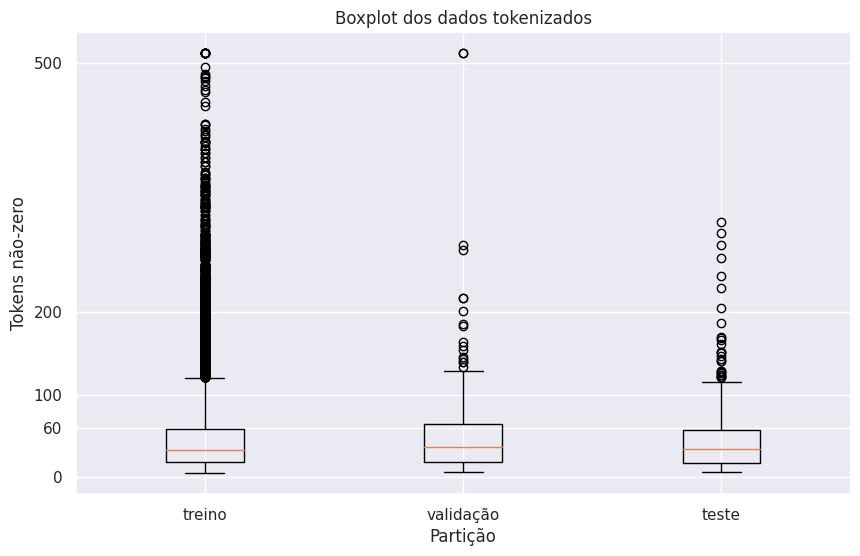

In [73]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.boxplot(number_ids_matrix)
ax1.set(
        title='Boxplot dos dados tokenizados',
        xlabel='Partição',
        ylabel='Tokens não-zero',
        )
ax1.set_yticks([0, 60, 100, 200, 500])
ax1.set_xticklabels(['treino','validação','teste'])
plt.show()

Agora que podemos visualizar a distribuição do tamanho do vetor de tokens para cada review, é possível fazer uma escolha coerente. Se escolhermos o valor de 60 para truncamento, manteremos 75% dos reviews intactos. Ao mesmo tempo, é fácil inferir que, em reviews com mais de 60 palavras, o sentimento das diversas frases se repete. Obviamente, mais palavras darão mais confiança para a previsão do modelo, mas temos que considerar o custo e benefício que cada parâmetro terá.

Logo, será refeita a tokenização com o limite máximo de 60 tokens por review.

In [74]:
# Nova tokenização com limite de 60 tokens por frase
def tokenize_function_truncate(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=60)

tokenized_train_dataset = dataset['train'].map(tokenize_function_truncate, batched=True)
tokenized_validation_dataset = dataset['validation'].map(tokenize_function_truncate, batched=True)
tokenized_test_dataset = dataset['test'].map(tokenize_function_truncate, batched=True)

Map:   0%|          | 0/30720 [00:00<?, ? examples/s]

Map:   0%|          | 0/320 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

In [75]:
print('nova composição do texto tokenizado na posição', i)
print('não-zeros:', np.count_nonzero(tokenized_train_dataset[i]['input_ids']))
print('zeros:', tokenized_train_dataset[i]['input_ids'].count(0))

nova composição do texto tokenizado na posição 0
não-zeros: 57
zeros: 3


---

## 2.5 Treinamento do modelo

Finalmente podemos começar o treinamento do modelo. Primeiramente, baixamos o modelo BERT pré-treinado para classificações sequenciais e dizemos quantos valores possíveis nosso modelo terá que prever.

In [76]:
np.random.seed(seed)

model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=5)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Agora, escolhemos os hiperparâmetros do treinamento do modelo.

Como temos muitas observações para treinamento, realizaremos o treino de fine-tunning com uma única época, o que significa que cada review será vista apenas uma vez no treino. Isso praticamente garantirá que não haverá overfitting do modelo, já que ele estará vendo exemplos novos a cada momento de treinamento, resultando em um modelo robusto e com grande capacidade de generalização.

Como utilizaremos o treinamento de época única, temos que dizer para o modelo de quantos em quantos steps ele realizará as tarefas de log, avaliação e salvamento do modelo parcialmente treinado. Foi escolhido 10 steps para a anotação do log e 20 para avaliação e salvamento do modelo, caso este apresente o melhor desempenho até então.



Depois disso, temos que especificar que queremos que, caso a avaliação do modelo no final do treinamento seja menor que a avaliação em um step anterior, a configuração com melhor avaliação deve ser utilizada. Para isso, temos que especificar que a métrica escolhida para esta avaliação é a acurácia e que queremos maximizar esta métrica. Para diminuir a quantidade de arquivos gerados, apenas os dois melhores modelos serão salvos.



Em relação ao learning rate, valores maiores que $10^{-4}$ se mostraram majoritariamente inúteis, já que resultaram em acurácia ao redor da aleatoriedade (20% para o nosso caso de 5 classes). Isso é corroborado pelos autores do BERT, que recomendam learning rate entre $2.10^{-5}$ e $5.10^{-5}$. Valores testados menores que $10^{-6}$ apresentaram estabilidade, mas demoraram muito para apresentar uma acurácia satisfatória, significando que os steps iniciais foram pouco eficientes. O valor de learning rate que apresentou melhor resultado inicial foi o de $3.10^{-5}$. É importante ressaltar que este parâmetro apenas controla o valor inicial do learning rate, já que o método de treinamento utilizado varia seu valor ao longo do treino.



Por fim, temos que escolher os dois parâmetros mais importantes para o desempenho do modelo: tamanho de batch e máximo de steps. O tamanho do batch e os steps foram escolhidos afim de maximizar o número de observações vistas no treino $T = batch \times steps$. Diversas combinações foram testadas para estes parâmetros.

Tamanhos de batch menor do que 16 demoraram bem mais para obter acurácia acima de 50%, mesmo aumentando o número de steps para igualar o $T$. Isso provavelmente se deve ao tamanho do BERT e seu número de pesos. Quanto maior o número de pesos, mais demora a atualização entre os steps. Logo, mesmo que o par 100 steps e batch 2 resulte no mesmo número de observações que 25 steps e batch 8, a segunda configuração acaba por ser mais eficiente em relação ao tempo computacional.

Ao mesmo tempo, batchs muito grandes diminuem as avaliações intermediárias, aumentando as chances de cairmos em um mínimo local. Além disso, somos limitados pela memória máxima que pode ser utilizada pelo colab. Tendo essas consequências e limitações em mente, foram testadas várias configurações e o modelo pareceu continuar aprendendo independentemente dos parâmetros de step e batch, desde que continuássemos fornecendo mais observações para o treinamento dele e seu batch fosse maior que 16. Então, foi tomada a decisão de utilizar o máximo de memória e o máximo de tempo ininterrupto de execução que o colab permitisse.

Após algumas tentativas de treino, chegou-se nos parâmetros que obtiveram o modelo de melhor desempenho. O tamanho de batch máximo que a memória do colab aceitou foi de 128. Com esse tamanho de batch, o número máximo de steps que manteve o tempo estimado de treinamento abaixo de 6 horas (com alguma folga) foi de 240 steps.

Podemos agora instanciar os parâmetros de treino:

In [77]:
MODEL_PATH = "trained_model"

training_args = TrainingArguments(
    output_dir=MODEL_PATH,
    per_device_eval_batch_size=32,
    evaluation_strategy="steps",
    logging_strategy="steps",
    eval_steps=20,
    save_steps=20,
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    greater_is_better=True,
    save_total_limit=2,
    learning_rate=3e-5,
    max_steps=steps,
    per_device_train_batch_size=batch_size
)

Depois, instanciamos a métrica e a classe de treinador do modelo:

In [78]:
np.random.seed(seed)

metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

MODEL_PATH = "trained_model"

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_validation_dataset,
    compute_metrics=compute_metrics,
)

Finalmente, podemos realizar o treinamento do modelo. Note que a célula abaixo pode realizar o treinamento do modelo novamente. Porém, como padrão, ela importará o modelo que já foi treinado com os parâmetros citados acima, para diminuir o tempo de execução do notebook.

Caso o leitor deseje realizar o fine-tunning do modelo novamente, basta mudar a variável TRAIN_MODEL (localizada na primeira célula de código do notebook) para o valor 1.

In [79]:
np.random.seed(seed)

# Treina o modelo e cria o log de treinamento. Também salva os dois em arquivos.
if TRAIN_MODEL == 1:
  print('treinando o modelo:')
  trainer.train()

  trainer.save_model(MODEL_PATH)
  tokenizer.save_pretrained(MODEL_PATH)

  df_log = pd.DataFrame(trainer.state.log_history)
  df_log.to_csv('model_training_log.csv', index=False)

  print('')
  print('treinamento finalizado com sucesso!')

# Importa o modelo, tokenizador e o log de treinamento. Também instancia o treinador.
else:
  print('importando o modelo:')
  file_id = "1tgKeK0QfrNsYR2gmTVOMUIW8bSmzpoNb"
  url = f"https://drive.google.com/uc?id={file_id}"

  folder_path = "./download"  # Pasta para onde o arquivo será baixado
  os.makedirs(folder_path, exist_ok=True) # Cria a pasta de destino se necessário

  output = "download/model.zip"  # Especifica o nome do arquivo a descompactar
  gdown.download(url, output)

  with zipfile.ZipFile(output,'r') as zip_ref:
    zip_ref.extractall()

  model = AutoModelForSequenceClassification.from_pretrained('model')
  tokenizer = AutoTokenizer.from_pretrained('model')

  trainer = Trainer(
                    model=model,
                    args=training_args,
                    train_dataset=tokenized_train_dataset,
                    eval_dataset=tokenized_validation_dataset,
                    compute_metrics=compute_metrics,
                    )

  df_log = pd.read_csv(base_url+'model_training_log.csv')

  print('')
  print('modelo e log de treinamento importados com sucesso!')

importando o modelo:


Downloading...
From: https://drive.google.com/uc?id=1tgKeK0QfrNsYR2gmTVOMUIW8bSmzpoNb
To: /content/download/model.zip
100%|██████████| 402M/402M [00:02<00:00, 168MB/s]



modelo e log de treinamento importados com sucesso!


---

## 2.6 Resultados

### Log do treinamento

Agora que temos os dados de treino (seja obtido pelo treinamento, ou importado) podemos plotá-los.

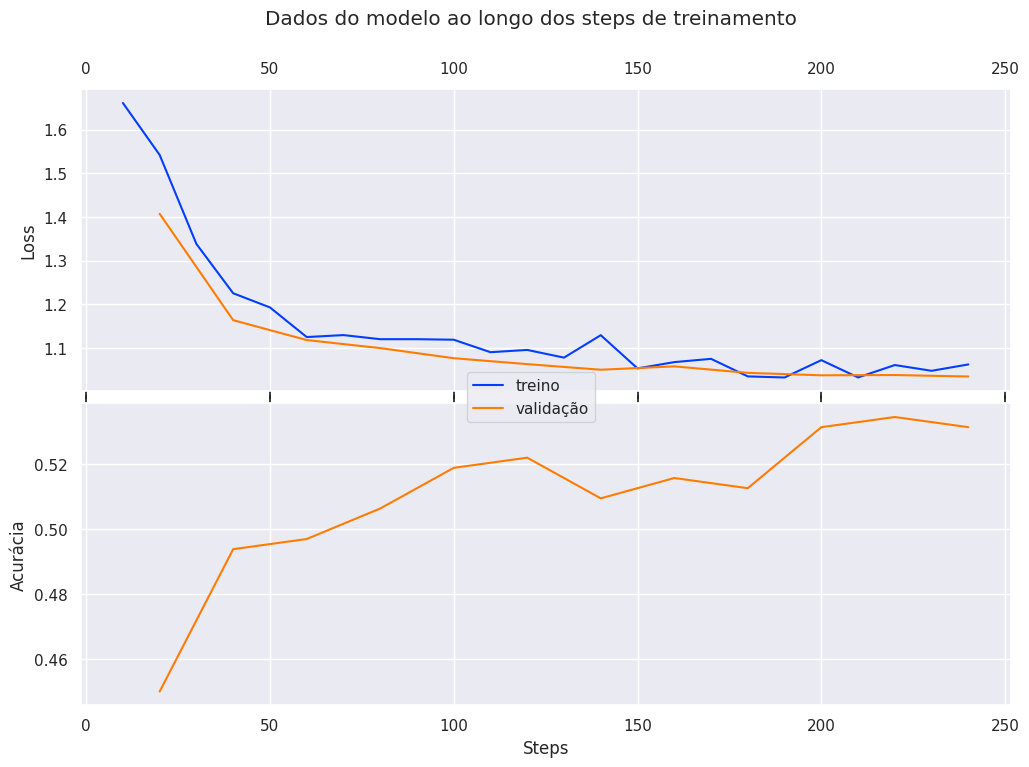

In [80]:
train_steps = df_log.step.dropna().unique()
eval_steps = df_log.step[df_log.step.duplicated()][:-1]

palette = sns.color_palette('bright')
fig,(ax1, ax2) = plt.subplots(2, 1, figsize=(12,8), sharex=True)
fig.subplots_adjust(hspace=0.04)
fig.suptitle('Dados do modelo ao longo dos steps de treinamento')

ax1.plot(train_steps, df_log.loss.dropna(), color=palette[0], label='treino')
ax1.plot(eval_steps, df_log.eval_loss.dropna(), color=palette[1], label='validação')
ax1.tick_params(top=False, labeltop=True, bottom=True, labelbottom=False)
ax1.set(ylabel='Loss')
handles, labels = ax1.get_legend_handles_labels()

ax2.plot(eval_steps, df_log.eval_accuracy.dropna(), color=palette[1])
ax2.tick_params(top=True, labeltop=False, bottom=False, labelbottom=True)
ax2.set(xlabel='Steps', ylabel='Acurácia')

fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.5, 0.495))

plt.show()

Podemos ver acima a evolução do modelo ao longo do treinamento. No gráfico de Loss, é possível notar que não houve overfitting. Esse fato era esperado porque, como já foi comentado anteriormente, foi utilizado uma única época de treinamento. Isso significa que o modelo viu cada observação apenas uma vez, impossibilitando-o decorar as características dessas observações. Isso resultou em um modelo capaz de generalizar muito bem os conhecimentos obtidos no treino, como pode ser notado pelo fato do loss de treino acompanhar muito de perto o de validação.

No segundo gráfico podemos notar três principais características.

- Foi benéfico escolher muitos steps. O modelo atingiu o mínimo local de aproximadamente 52% de acurácia no step 120, o qual foi seguido de 3 avaliações piores. Se tivéssemos parado no step 180, não obteríamos a melhora que começa a ser observada a partir do step 200. Nota-se também, que houve uma pequena queda no step 240, mas como configuramos para o treinamento para salvar o melhor modelo, esse step será ignorado e o modelo final será o do step 220.

- O modelo foi capaz de entender o problema mesmo com poucas observações. Se observarmos o primeiro ponto, o modelo já tinha obtido uma acurácia de aproximadamente 45%. Essa acurácia pode parecer pior do que um modelo aleatório à primeira vista, mas como nosso problema é uma classificação de 5 classes, a acurácia aleatória é de 20%. Este desempenho mesmo com poucas observações vista no treino se deve a termos escolhido um modelo pre-treinado. Caso tivéssemos escolhido treinar um modelo do zero, ao invés de fazer um fine-tuning, teríamos de esperar milhares de observações de treino até o modelo conseguir se distanciar da aleatoriedade.

- Não parece que a acurácia do modelo irá melhorar significativamente. Até o segundo ponto de validação foram vistas 5120 observações e até o último ponto foram vistas 30720. Entre esses dois pontos, melhoramos a acurácia em apenas 4%. Isto é um indício que estamos nos aproximando da acurácia máxima possível se apenas aumentarmos o número de observações, mesmo que a melhora nos últimos 3 pontos indique que é possível aumentar um pouco mais. Isto é um problema porque nosso modelo está acertando em apenas pouco mais de metade dos casos.



Em relação ao último ponto citado acima, a acurácia relativamente baixa provavelmente se deve a um desafio comum no problema de reviews de usuários. Geralmente, a nossa variável objetivo (label) é algo atribuído por um conselho de especialistas com critérios bem definidos. Não só o nosso label é dado por uma única pessoa, mas é dado por uma pessoa diferente em cada observação. O resultado disso é que a nota dada por dois reviews teóricos idênticos poderia divergir se fosse dada por duas pessoas diferentes. Resumidamente, o label que estamos utilizando pode ser considerado de baixa confiabilidade ou consistência ao longo de todas as observações. Porém, é fácil de imaginar que, independente da pessoa que estiver dando a nota e escrevendo o review, o sentimento de satisfação ou insatisfação é universal. **Logo, espera-se que a inconsistência da nota esteja concentrada nos pares de nota: 0 e 1; 3 e 4.**

Podemos verificar se a afirmação acima é verdadeira observando a matriz de confusão da previsão do modelo em função do label real.

### Resultados não utilizados dos demais pré-processamentos de NLP

Antes de entrar na análise da partição de teste, será mostrado um pouco dos resultados dos treinamentos que incluíram: lematização, remoção de stop-words, remoção de caracteres especiais e remoção de letras maiúsculas.

Como já foi comentado anteriormente, o modelo final não incluiu os pré-processamentos citados porque eles pioraram a acurácia do modelo. Isso provavelmente se deveu ao fato de grande parte desses pré-processamentos já serem feitos direta ou indiretamente pelo BERT. O tokenizador, além de transformar as palavras em números, também cria um vetor de atenção que diz quais tokens o modelo deve priorizar. O tokenizador também atribui tokens especiais a caracteres ou palavras que se mostraram pouco relevantes no pré-treinamento. Além disso, em relação aos pré-processamentos que reduziriam a quantidade de palavras a serem aprendidas pelo modelo, esta quantidade passa a ser um problema menor quando foi utilizada uma quantidade absurda de frases como foi feito no pré-processamento do BERT.

**Por fim, o BERT é um modelo de transformer bidirecional, ou seja, ele depende das palavras anteriores e posteriores a cada palavra na frase.** Considerando que ele realizou um treinamento com 800 milhões de palavras sem os pré-processamentos acima, não é difícil imaginar que [modificar muito o texto original piora a acurácia dos modelos baseados no BERT](https://towardsdatascience.com/does-bert-need-clean-data-part-2-classification-d29adf9f745a).

 Seguem as tabelas de treinamento de algumas configurações testadas:

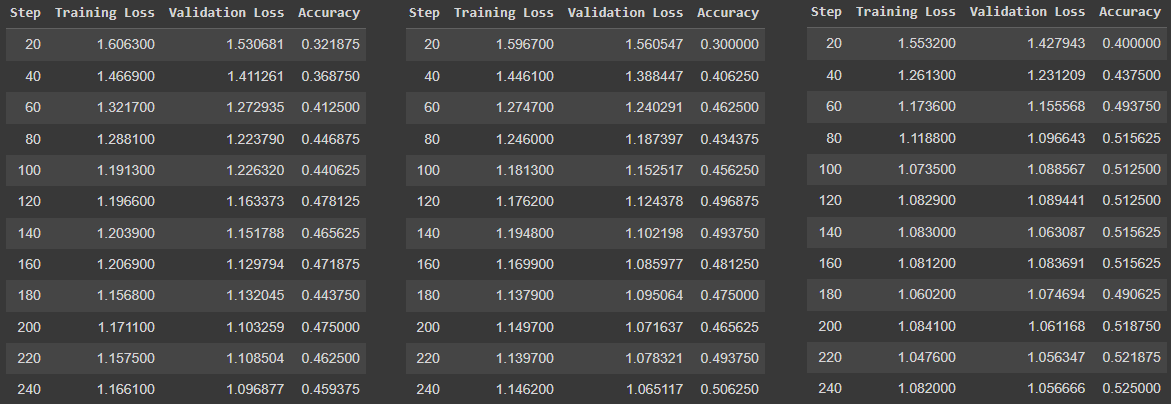

As configurações acima foram: todos os pré-processamentos citados; todos menos lematização; e todos menos a remoção de stop-words, respectivamente.

É interessante notar que a realização de todos os pré-processamentos foi a configuração com pior acurácia, demonstrando que a aplicação cega de pré-processamentos nunca deve ser feita sem verificação ou muito embasamento teórico.

Também podemos notar que a configuração que manteve os stop-words foi a que chegou mais perto da melhor acurácia. Isso significa que a remoção de stop-words é um pré-processamento altamente nocivo ao modelo BERT. Isso faz sentido se pensarmos que este pré-processamento é o que mais altera a ordenação original de palavras, na qual o modelo BERT se baseia e realizou extenso treinamento sobre.

Terminado esse adendo, **podemos voltar à configuração original que obteve a melhor acurácia até então, na qual não foi realizado nenhum dos pré-processamentos citados nessa subseção.**

### Teste e matriz de confusão

Primeiro, vamos verificar a acurácia de teste com o critério padrão, onde temos 5 classes diferentes.

In [81]:
# Chama o modelo para criar as previsões em cima da partição de teste
test_model_output = trainer.predict(tokenized_test_dataset)

# Acessa a parte onde as métricas foram armazenadas
test_model_output.metrics

{'test_loss': 1.041521430015564,
 'test_accuracy': 0.538,
 'test_runtime': 104.7281,
 'test_samples_per_second': 4.774,
 'test_steps_per_second': 0.153}

O critério padrão atingiu uma acurácia de 53,8%.



Antes de ver a matriz de confusão, é importante verificar o balanceamento e a tendência do modelo.

In [82]:
# Pega as previsões e valores reais para os labels de teste
test_pred = [np.argmax(x) for x in test_model_output.predictions]
test_real = test_model_output.label_ids

In [83]:
Counter(test_real)

Counter({0: 100, 1: 100, 2: 100, 3: 100, 4: 100})

Como esperado, a partição de teste está balanceada.

Verificando agora o número de labels previstos:

In [84]:
Counter(test_pred)

Counter({0: 120, 1: 92, 2: 91, 3: 91, 4: 106})

Aqui podemos ver que o modelo tende a prever mais valores extremos (0 e 4) do que valores intermediários (1 a 3), priorizando a nota mínima.

Agora podemos verificar a matriz de confusão. Plotaremos ela normalizada pelo número real do label (linhas) para visualizar melhor para onde o modelo está errando.

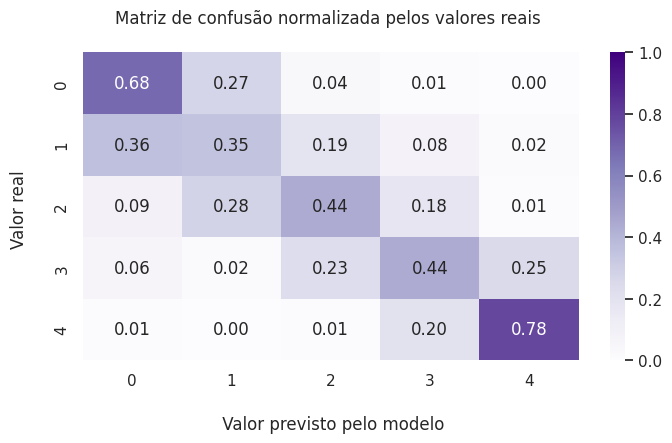

              precision    recall  f1-score   support

           0       0.57      0.68      0.62       100
           1       0.38      0.35      0.36       100
           2       0.48      0.44      0.46       100
           3       0.48      0.44      0.46       100
           4       0.74      0.78      0.76       100

    accuracy                           0.54       500
   macro avg       0.53      0.54      0.53       500
weighted avg       0.53      0.54      0.53       500



In [85]:
# Calcula e plota a matriz de confusão do teste
plt.figure(figsize=(8,4))
fx=sns.heatmap(confusion_matrix(test_real, test_pred, normalize='true'),
               annot=True, fmt=".2f", cmap="Purples", vmin=0, vmax=1)
fx.set_title('Matriz de confusão normalizada pelos valores reais \n')
fx.set_xlabel('\n Valor previsto pelo modelo')
fx.set_ylabel('Valor real \n')
plt.show()

# Calcula e printa as métricas do teste
print(classification_report(test_real, test_pred))

Observando as linhas de valor real 1 e 3 é possível notar um pouco da característica mencionada. Os erros acontecem mais para o lado dos extremos (0 e 4) do que para o lado neutro (2). Este fato é mais evidente no valor real 1, onde o modelo errou mais para a previsão 0 (36%) do que acertou a previsão no próprio valor 1 (35%). É importante ressaltar que este erro (1 para 0), apesar de ser o mais comum, tem pouco impacto na tarefa que será testada na seção seguinte, já que o mais importante é reconhecer se o texto é negativo ou positivo, e não a intensidade do sentimento.

Dito isso, olhando para a terceira linha da matriz, fica claro que o modelo tem dificuldades em reconhecer reviews neutros também. Porém, é interessante notar que não temos muitos erros para dois labels de distância do real. O máximo de erros onde o valor previsto está distante de dois ou mais labels do real é de 10%. Este tipo de erro é o mais impactante em classificações sequenciais, porque estaria classificando um texto positivo com um negativo, ou até mesmo um texto neutro como muito negativo.

Como última observação, podemos notar também que o modelo tem maior facilidade de classificar corretamente sentimentos extremos (0 e 4), como pode ser visto na coluna de precisão. A mesma coluna também mostra que, apesar do modelo tender a classificar textos como 0, ele é melhor em classificar corretamente textos positivos.


Agora que conhecemos melhor o comportamento e limitações do nosso modelo, podemos verificar como ele se comporta diante de uma tarefa similar.

### Tweets simulados

Primeiramente, temos que escolher quais serão nossos textos de teste. O ideal seria ter centenas de exemplos em um dataset balanceado. Porém, como não foi encontrado um dataset desses que falasse sobre as categorias de produtos e usasse uma linguagem parecida com a utilizada no treino, serão simulados alguns tweets aqui.

A ideia é criar textos mais próximos de tweets do que reviews, mas sem utilizar abreviações ou gírias. Ao mesmo tempo, os tweets tem de ter a mesma língua utilizada e falar dos mesmos tipos de produtos que foram utilizados no treinamento (eletrônicos, mobília e material de escritório).

In [86]:
# Cria o vetor de tweets simulados
simulated_tweets=[
    "Bought a chair online and it arrived a week late",
    "Just installed my new RTX. PC is flying",
    "Just installed my new RTX. PC is FLYING",
    "No idea why everyone is complaining about Watch_Dogs, game runs just fine on my PS4",
    "Bought a cabinet that had the wrong dimensions listed... but it actually fits in my living room",
    "I can't work because the monitor I ordered doesn't come with a cable",
    "Just missed a meeting because my new laptop decided it needed to update windows",
    "Can't believe someone could fuck up the packing this badly",
    "Can't believe I lived for 30 years without a universal remote. Just spent the whole Sunday laying on my couch",
    "My new table came with a huge scratch. I can't have my friends come over like this",
    "The new apple watch looks weird",
    "My house looks weird with the new lighting",
    "My house looks awesome with the new lighting"]

Agora que criamos os textos dos tweets, temos que utilizar o mesmo tokenizador do modelo.

In [87]:
tokenized_tweets = [tokenizer(x, return_tensors="pt") for x in simulated_tweets]

Depois, passamos os tweets tokenizados pelo modelo e tratamos a saída para obter o label previsto e as probabilidades de cada label segundo o modelo.

In [88]:
def softmax(x):
    return(np.exp(x)/np.exp(x).sum())

# argmax pega o maior valor de saída e softmax transforma as saídas em probabilidades
pred_label_tweets = [np.argmax(model(**x).logits.detach().numpy()) for x in tokenized_tweets]
prob_label_tweets = [softmax(model(**x).logits.detach().numpy()) for x in tokenized_tweets]

In [89]:
prob_labels_tweets = [x.tolist() for x in prob_label_tweets]

In [90]:
# Um vetor de probabilidade para cada classe
label_prob_0 = []
label_prob_1 = []
label_prob_2 = []
label_prob_3 = []
label_prob_4 = []
for probs in prob_labels_tweets:
  label_prob_0.append(probs[0][0])
  label_prob_1.append(probs[0][1])
  label_prob_2.append(probs[0][2])
  label_prob_3.append(probs[0][3])
  label_prob_4.append(probs[0][4])

Por fim, agrupa-se os tweets, previsão e probabilidades em um dataframe para melhor visualização.

In [91]:
data = list(zip(simulated_tweets, pred_label_tweets, label_prob_0, label_prob_1, label_prob_2, label_prob_3, label_prob_4))
df_tweets = pd.DataFrame(data, columns=['tweet', 'predicted', 'prob0', 'prob1', 'prob2', 'prob3', 'prob4'])
df_tweets

,tweet,predicted,prob0,prob1,prob2,prob3,prob4
0,Bought a chair online and it arrived a week late,0,0.815,0.118,0.047,0.012,0.009
1,Just installed my new RTX. PC is flying,4,0.013,0.011,0.030,0.190,0.755
2,Just installed my new RTX. PC is FLYING,4,0.060,0.025,0.055,0.189,0.671
3,No idea why everyone is complaining about Watc...,3,0.013,0.030,0.100,0.432,0.425
4,Bought a cabinet that had the wrong dimensions...,3,0.006,0.019,0.069,0.467,0.439
5,I can't work because the monitor I ordered doe...,0,0.701,0.207,0.074,0.012,0.006
6,Just missed a meeting because my new laptop de...,2,0.270,0.245,0.317,0.123,0.045
7,Can't believe someone could fuck up the packin...,0,0.476,0.206,0.169,0.082,0.067
8,Can't believe I lived for 30 years without a u...,0,0.602,0.132,0.092,0.067,0.107
9,My new table came with a huge scratch. I can't...,0,0.581,0.207,0.134,0.045,0.033


Dos 12 tweets criados, a maior parte foi prevista satisfatoriamente. As grandes exceções foram:

- 'Just missed a meeting because my new laptop decided it needed to update windows' - A nota prevista pelo modelo foi nota 2, que deveria indicar indiferença, quando claramente este existe um sentimento negativo no texto. Mesmo que a decisão final tenha sido incorreta, é interessante notar que as probabilidades de nota 0 e 1 estão bem próximas da probabilidade da nota 2, indicando que o modelo suspeitava que fosse um tweet negativo.

- 'Can't belive I lived for 30 years without a universal remote. Just spent the whole sunday laying on my couch' - Claramente este é um tweet positivo sobre ter gostado do produto novo, mas o modelo atribuiu um sentimento muito negativo (nota 0) a ele. Além disso, ele deu probabilidade muito baixa do texto ser positivo ou muito positivo.

Todos os outros tweets foram classificados "corretamente", mesmo que alguns sejam discutíveis. É possível notar mais alguns pontos sobre as classificações acima:

- Observando os tweets de índice 1 e 2, parece que o modelo penaliza a capitalização de palavras. Apesar de os dois tweets terem sido classificados como muito positivo, ao olhar a probabilidade do label 4, a capitalização da palavra 'flying' parece ter levado o modelo levemente para o lado negativo. Isso é interessante porque é fácil notar que, nesse caso, a capitalização indica animação do consumidor, o que deveria levar o sentimento mais para o lado positivo. É provável que isso tenha ocorrido porque o modelo viu mais capitalizações em reviews negativos do que positivos no treinamento.

- Esperava-se que os tweets de índice 3 e 4 fossem difíceis para o modelo, já que eles possuem linguagem um pouco conflitante, mas o label previsto foi aceitável. Em "***No idea why everyone is complaining about Watch_Dogs, game runs just fine on my PS4***", a frase possui as palavras 'complaining' e 'just fine' o que geralmente indicaria indiferença ou até negatividade, mas o modelo atribui corretamente uma nota 3. Em "***Bought a cabinet that had the wrong dimensions listed... but it actually fits in my living room***" temos as palavras 'wrong dimensions' o que provavelmente foi visto nos reviews de treino como algo negativo, mas parece que a frase seguinte ser iniciada por 'but' e ter 'fits' foi o suficiente para o modelo indicar um sentimento positivo para este tweet.

- Os três últimos tweets mostram claramente o poder de mudar uma única palavra. Nos dois primeiros podemos ver que a palavra 'weird' faz o modelo tender (corretamente) ao aumento das probabilidades de sentimento neutro ou negativo. Já no último tweet, vemos que ao mudar uma única palavra a probabilidade de sentimento positivo aumenta drasticamente.

No final, pode-se dizer que a transferência de tarefa foi um sucesso, ao menos no nosso teste limitado. Dos 13 exemplos de tweets simulados, o modelo foi capaz de fazer previsões satisfatórias em 11 deles.

In [92]:
# # Código para buscar por palavras nos reviews utilizados para
# # treinamento do modelo. Deixado aqui para conveniência do leitor.

# word_to_search = 'RTX'

# for i in df_sample['train'][df_sample['train']['text'].str.contains(word_to_search)].index:
#   print(df_sample['train']['label'][i], ':', df_sample['train']['text'][i])

---

## 2.7 O que mais poderia ser feito

Frente à acurácia de 53,8% na tarefa de reviews e os testes muito limitados na tarefa de tweets, é interessante listar aqui algumas melhorias que poderiam ser feitas nesta parte do MVP, mas foram deixadas de fora por falta de tempo:

- Aplicar os pré-processamentos citados no final da seção 2.4 para estudar seus efeitos na acurácia do BERT nas duas tarefas.

- Treinar o modelo por mais steps ou com maior tamanho de batch. Foi utilizado quase todo o limite do Google Colab, mas o log de treinamento parece indicar que ainda é possível aumentar um pouco mais a acurácia na tarefa de reviews. Seria interessante utilizar outra plataforma para fornecer mais observações para o treino, já que utilizamos menos de 50% do nosso dataset de treino.

- Aumentar o número de tweets simulados. Fica claro ao observar o nosso limitado número de tweets, que não temos um teste heterogêneo. Seria interessante aumentar o número de tweets simulados, com o intuito de melhorar a confiabilidade do teste.

- Buscar um dataset de tweets que esteja dentro das limitações citadas. Ainda afim de aumentar a confiabilidade do teste da segunda tarefa, seria interessante utilizar um dataset extenso de tweets sobre produtos que não utilizasse abreviações e tags. Também seria possível realizar alguns pré-processamentos em tweets reais para remover essas limitações do dataset.

---

## 2.8 Conclusão

Nesta segunda parte do MVP, foi realizado um fine-tunning do modelo pré-treinado [BERT-base-cased](https://huggingface.co/bert-base-cased) para prever notas de reviews de consumidores em lojas de varejo. Com o modelo treinado, foi avaliada sua capacidade de prever se um tweet tem sentimento positivo ou negativo. Apesar de ter sido testado em tweets simulados, com quantidade reduzida e linguagem controlada, o modelo se mostrou capaz de realizar uma tarefa para a qual não foi diretamente treinada.

O modelo foi treinado observando os textos de reviews da amazon e tentava prever a nota dada pelo usuário, que variava de 1 a 5. O treinamento do modelo utilizou uma única época com 30720 observações, tamanho de batch de 128 e 240 steps. Após o treinamento, o modelo obteve uma acurácia de 53,8% no dataset de teste, considerando as 5 classes distintas.

No final, o modelo foi testado em 13 tweets simulados, que foram criados segundo os seguintes critérios:

- O tweet deve expressar uma opinião sobre um produto de categoria vista no treinamento.

- Apesar de permitir linguagem coloquial, o tweet não pode conter abreviações, tags e links, já que estes não foram vistas no treinamento.

- Não deve haver erros graves de inglês no tweet.

Com as limitações citadas acima, o modelo previu corretamente 11 dos 13 tweets simulados, mesmo que algumas das notas sejam discutíveis. Este resultado mostra que o modelo em questão foi capaz de realizar uma tarefa similar a do treinamento, desde que em um ambiente controlado.



---

---